<a href="https://colab.research.google.com/github/MayconPrado-tt/Portfolio_Optimization/blob/main/asi_vamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INICIANDO OPTIMIZACIÓN - CLUSTERING GEOGRÁFICO

✓ Datos cargados: 100 tiendas
✓ Total de visitas semanales necesarias: 272
✓ Matriz de distancias calculada

👥 PASO 3: Asignando tiendas a 27 promotores...
   Restricciones: 6-21 visitas, máx 8 tiendas
   ✅ Re-clusterización exitosa en intento 1 (iteración 3)

📊 Resumen de asignación:
   ✅ Promotor 0: 2 tiendas, 8 visitas
   ✅ Promotor 1: 2 tiendas, 8 visitas
   ✅ Promotor 2: 5 tiendas, 10 visitas
   ✅ Promotor 3: 6 tiendas, 21 visitas
   ✅ Promotor 4: 3 tiendas, 6 visitas
   ✅ Promotor 5: 5 tiendas, 15 visitas
   ✅ Promotor 6: 4 tiendas, 10 visitas
   ✅ Promotor 7: 7 tiendas, 10 visitas
   ✅ Promotor 8: 7 tiendas, 17 visitas
   ✅ Promotor 9: 3 tiendas, 10 visitas
   ✅ Promotor 10: 4 tiendas, 14 visitas
   ✅ Promotor 11: 3 tiendas, 6 visitas
   ✅ Promotor 12: 3 tiendas, 8 visitas
   ✅ Promotor 13: 4 tiendas, 14 visitas
   ✅ Promotor 14: 2 tiendas, 6 visitas
   ✅ Promotor 15: 5 tiendas, 9 visitas
   ✅ Promotor 16: 5 tiendas, 13 visitas
   

/tmp/ipython-input-2604978654.py:798: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', stores_df['promoter'].nunique())


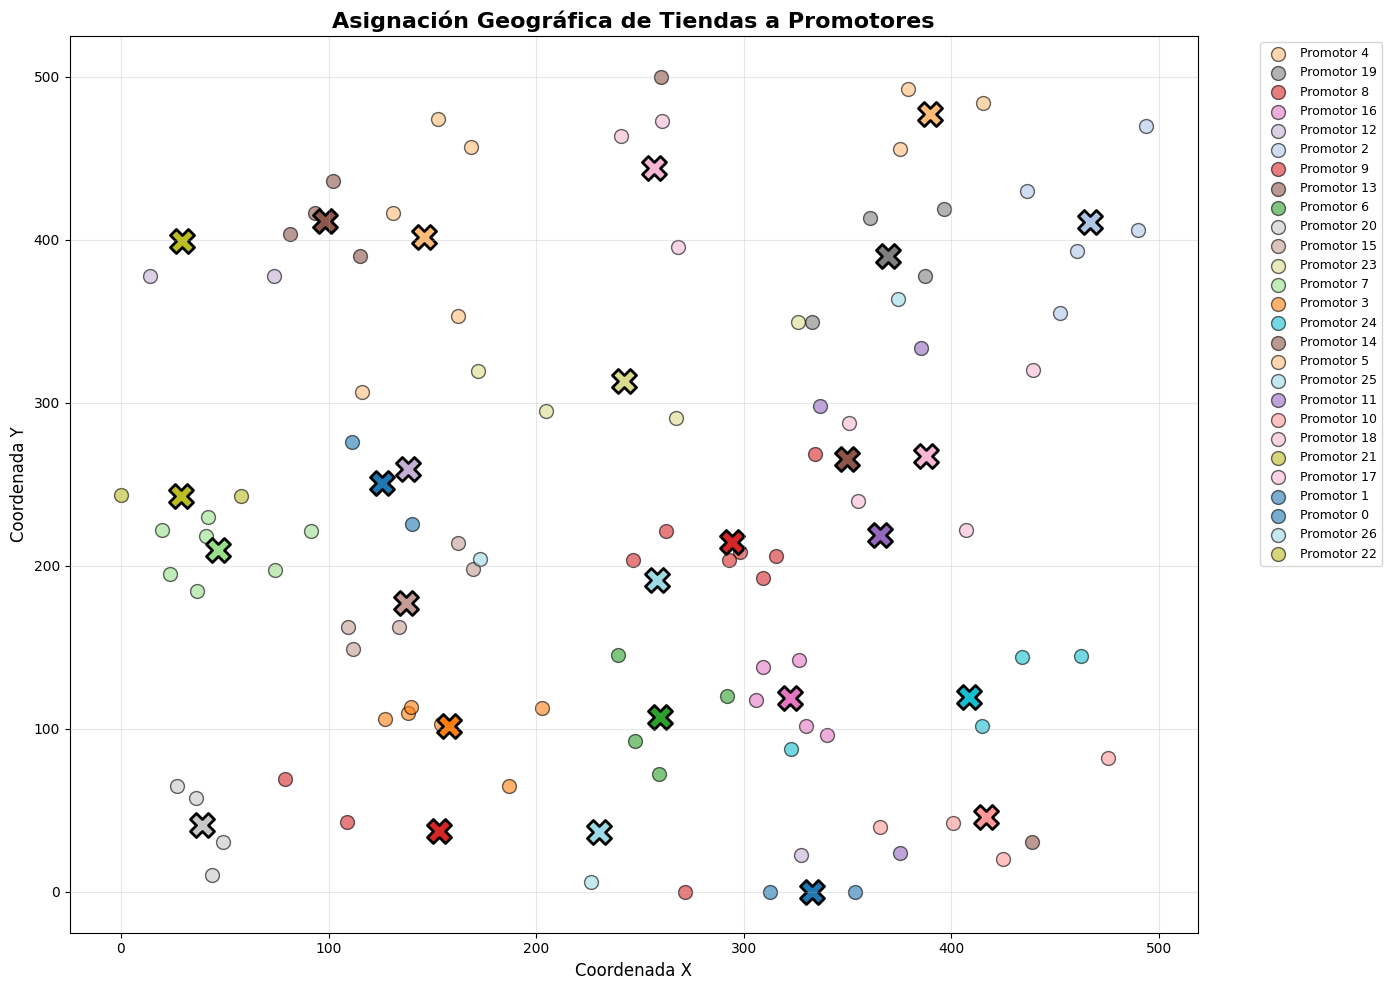


GENERANDO GRÁFICOS DE RUTAS DIARIAS
Graficando día 0...


/tmp/ipython-input-2604978654.py:826: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


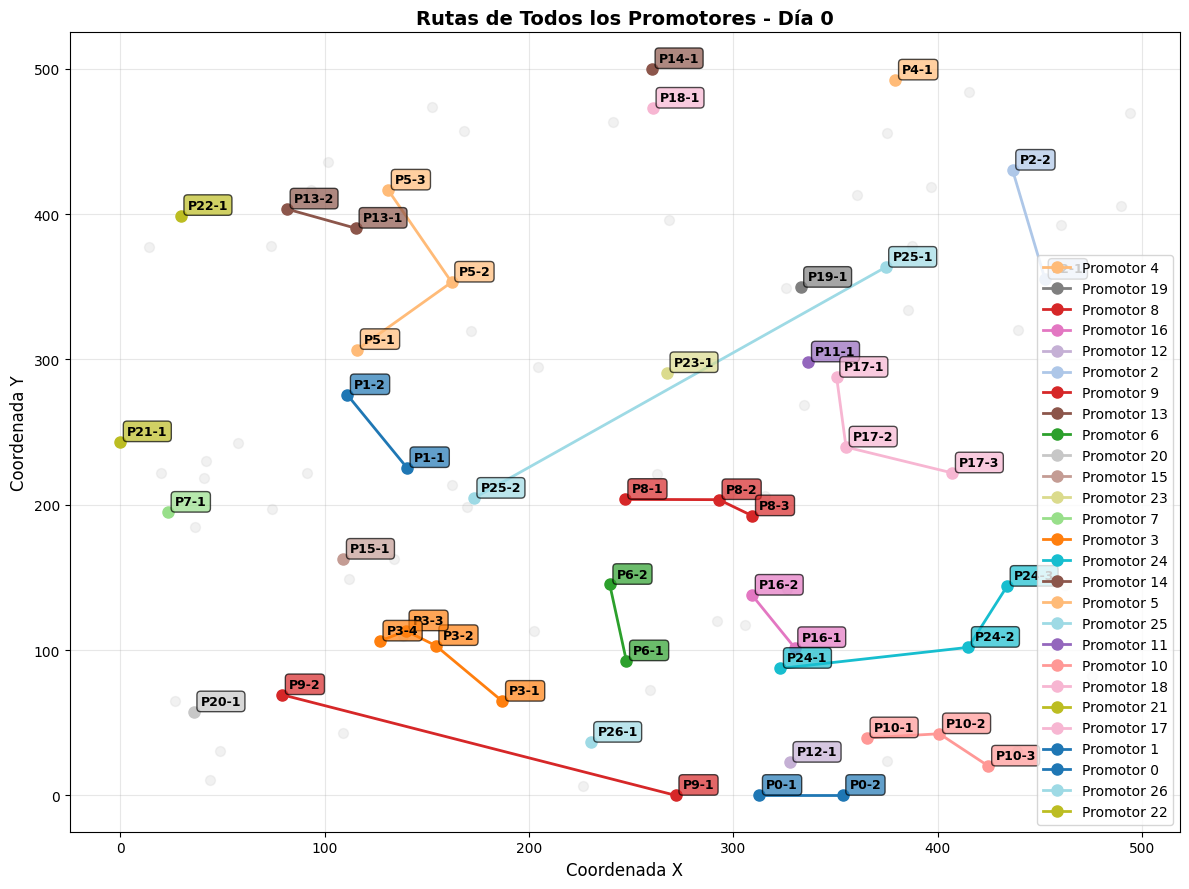

Graficando día 1...


/tmp/ipython-input-2604978654.py:826: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


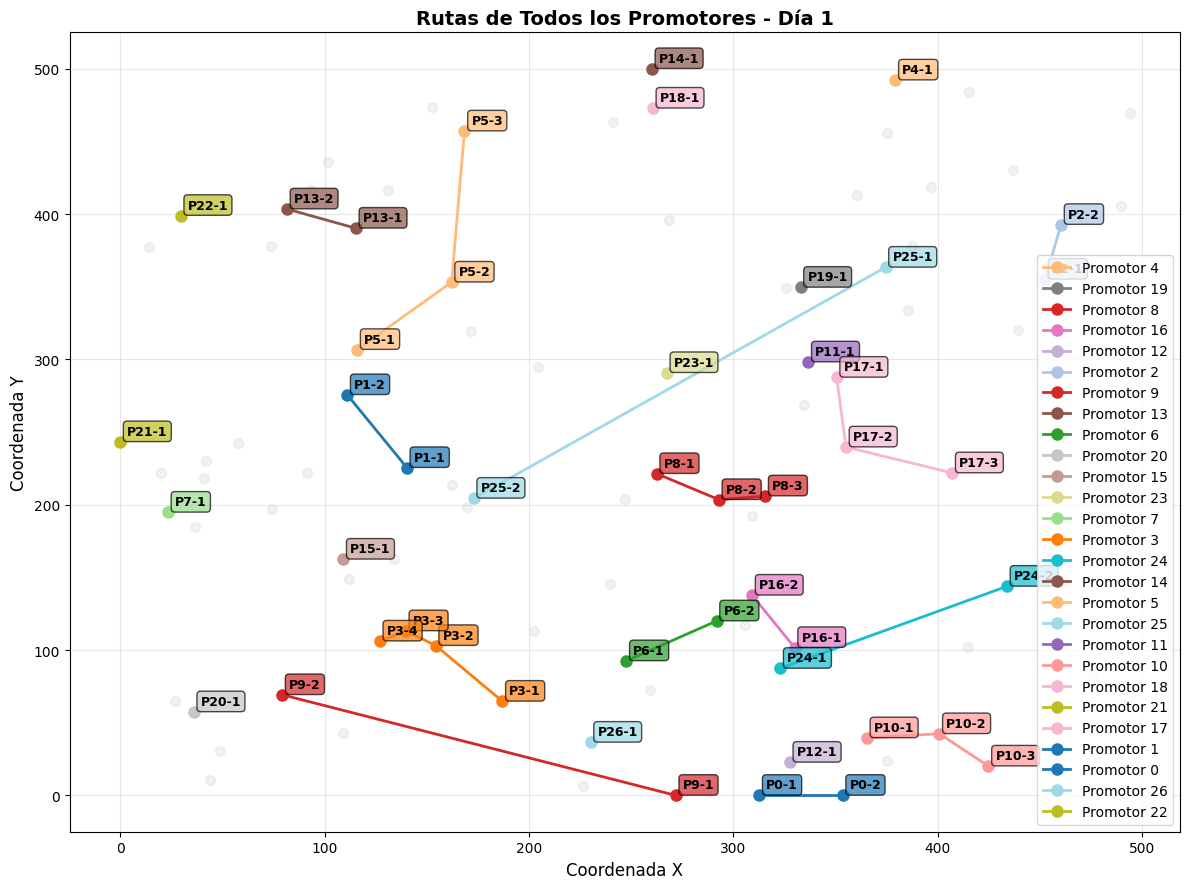

Graficando día 2...


/tmp/ipython-input-2604978654.py:826: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


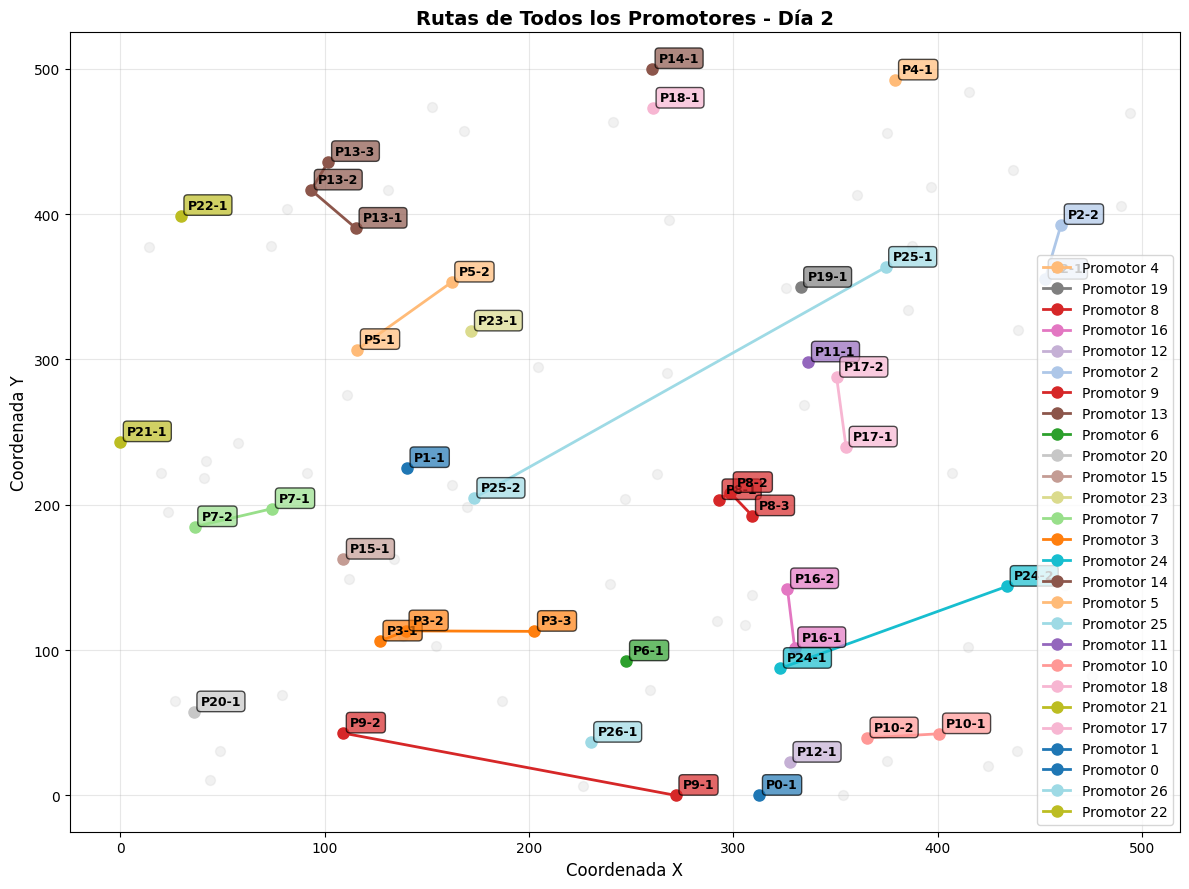

Graficando día 3...


/tmp/ipython-input-2604978654.py:826: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


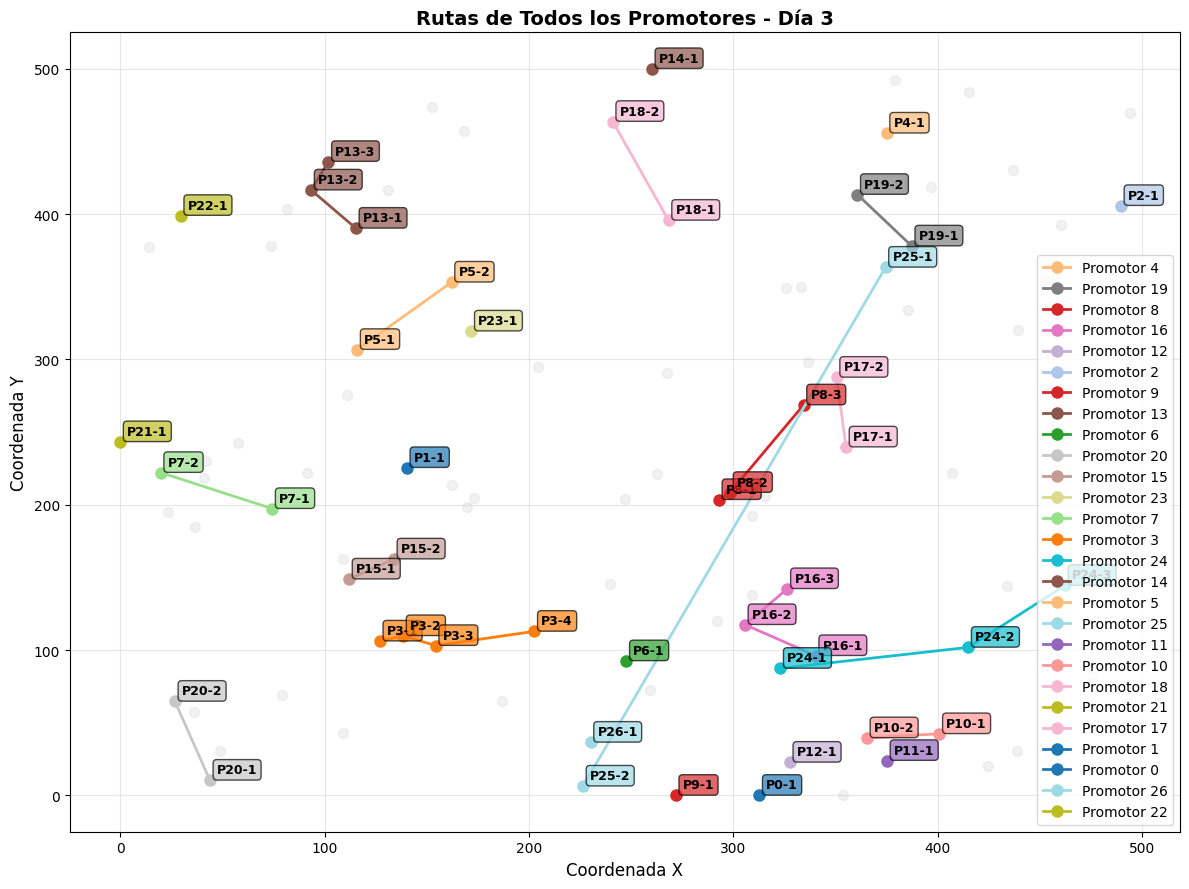

Graficando día 4...


/tmp/ipython-input-2604978654.py:826: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


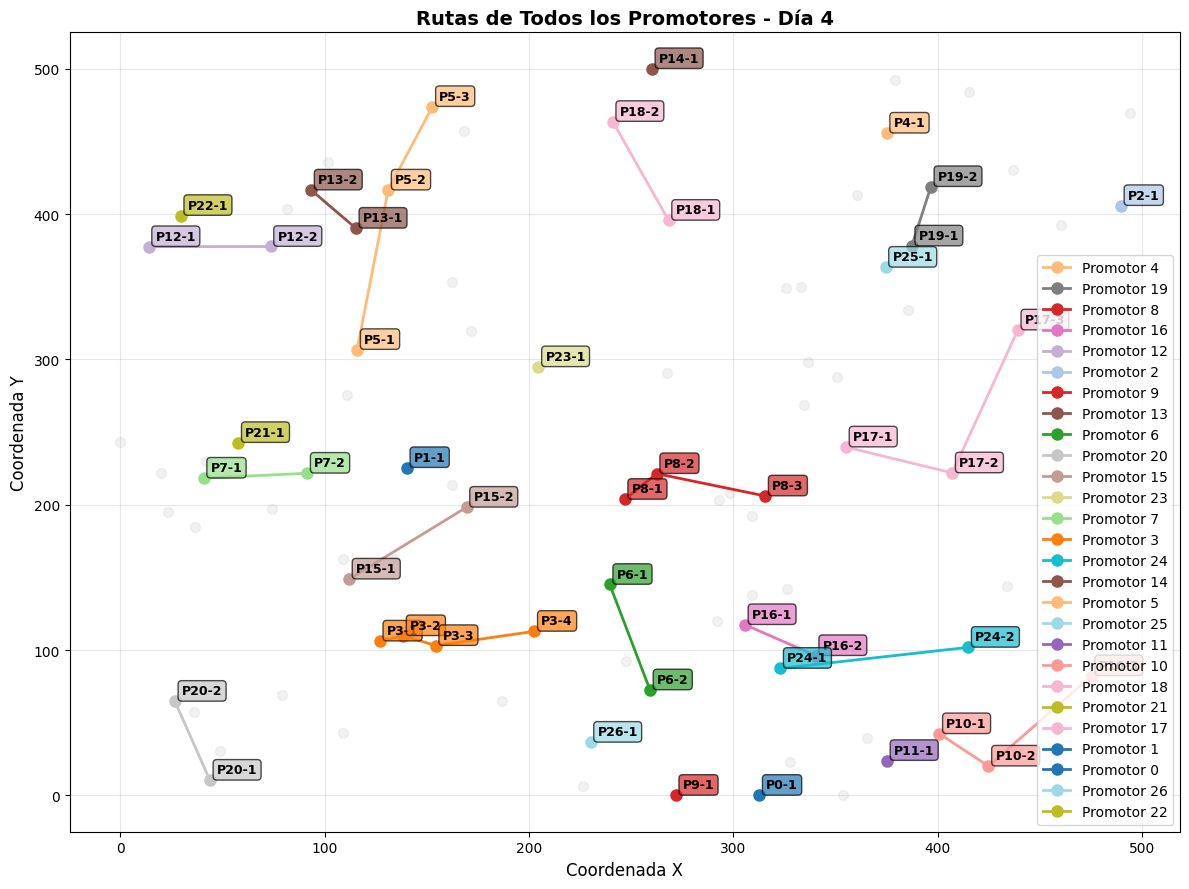

Graficando día 5...


/tmp/ipython-input-2604978654.py:826: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


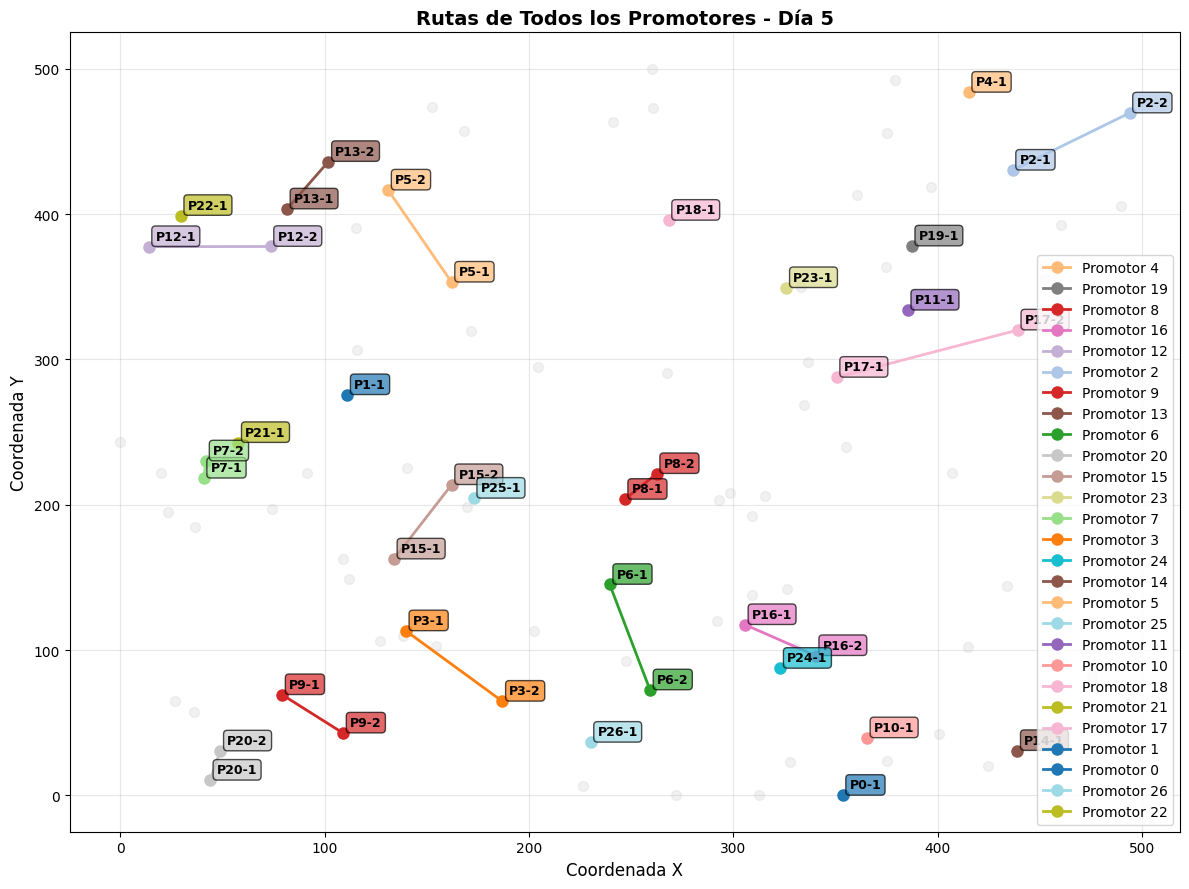

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from itertools import permutations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ==================================================
# CARREGAMENTO E CÁLCULOS BÁSICOS
# ==================================================

def load_data(filepath):
    """
    Carga los datos desde un archivo CSV.

    PASO 1: Lee el archivo CSV que contiene información de las tiendas
    incluyendo coordenadas, duración de visitas, frecuencia requerida
    y rentabilidad de cada tienda.
    """
    df = pd.read_csv(filepath)
    return df

def calculate_distance_matrix(df, time_per_unit):
    """
    Calcula la matriz de tiempos de viaje entre todas las tiendas.

    PASO 2: Crea una matriz donde cada elemento [i,j] representa el tiempo
    de viaje en MINUTOS entre la tienda i y la tienda j.
    - Primero calcula distancias euclidianas entre todas las coordenadas
    - Luego convierte esas distancias a tiempo usando el factor time_per_unit
    - El resultado es una matriz simétrica N x N donde N = número de tiendas
    """
    coords = df[['x_coordinate', 'y_coordinate']].values
    euclidean_dist = squareform(pdist(coords, 'euclidean'))
    time_matrix = euclidean_dist * time_per_unit / 60  # Convertir segundos a minutos
    return time_matrix

def assign_stores_geographic_weighted(df, n_promoters, min_visits=6, max_visits=21, max_stores=8):
    """
    Asigna tiendas a promotores con restricciones estrictas.

    PROCESO:
    1. Clustering geográfico inicial con KMeans
    2. Verificación de restricciones
    3. Re-clusterización iterativa hasta cumplir todas las restricciones

    Restricciones:
    - Cada promotor debe tener entre min_visits y max_visits visitas totales
    - Cada promotor puede tener máximo max_stores tiendas distintas
    - Las tiendas deben estar geográficamente cercanas

    Args:
        df: DataFrame con columnas ['store_id', 'x_coordinate', 'y_coordinate', 'initial_frequency']
        n_promoters: número de promotores disponibles
        min_visits: mínimo de visitas por promotor (default=6)
        max_visits: máximo de visitas por promotor (default=21)
        max_stores: máximo de tiendas por promotor (default=8)

    Returns:
        DataFrame con columna adicional 'promoter'
    """
    print(f"\n👥 PASO 3: Asignando tiendas a {n_promoters} promotores...")
    print(f"   Restricciones: {min_visits}-{max_visits} visitas, máx {max_stores} tiendas")

    stores = df.copy()
    coords = stores[['x_coordinate', 'y_coordinate']].values
    freq = stores['initial_frequency'].values

    max_attempts = 100
    best_assignment = None
    best_score = float('inf')

    for attempt in range(max_attempts):
        # PASO 3.1: Clustering geográfico inicial con peso en frecuencias
        freq_scaled = freq / freq.max()
        weighted_coords = coords * (1 + freq_scaled[:, np.newaxis] * 0.5)

        kmeans = KMeans(n_clusters=n_promoters, random_state=42 + attempt, n_init=10)
        stores['promoter'] = kmeans.fit_predict(weighted_coords)

        # PASO 3.2: Verificar restricciones iniciales
        visit_counts = stores.groupby('promoter')['initial_frequency'].sum()
        store_counts = stores.groupby('promoter').size()

        underloaded = visit_counts[visit_counts < min_visits].index.tolist()
        overloaded = visit_counts[visit_counts > max_visits].index.tolist()
        over_stores = store_counts[store_counts > max_stores].index.tolist()

        if not underloaded and not overloaded and not over_stores:
            print(f"   ✅ Clustering inicial válido en intento {attempt + 1}")
            best_assignment = stores.copy()
            break

        # PASO 3.3: Re-clusterización iterativa para corregir violaciones
        changed = True
        iterations = 0

        while changed and iterations < 50:
            changed = False
            iterations += 1

            # Recalcular métricas
            visit_counts = stores.groupby('promoter')['initial_frequency'].sum()
            store_counts = stores.groupby('promoter').size()

            # Identificar promotores con problemas
            underloaded = visit_counts[visit_counts < min_visits].index.tolist()
            overloaded = visit_counts[visit_counts > max_visits].index.tolist()
            over_stores = store_counts[store_counts > max_stores].index.tolist()

            # Si no hay problemas, salir
            if not underloaded and not overloaded and not over_stores:
                break

            # CORRECCIÓN 1: Resolver promotores con demasiadas tiendas
            for p in over_stores:
                cluster_stores = stores[stores['promoter'] == p].copy()
                coords_p = cluster_stores[['x_coordinate', 'y_coordinate']].values
                centroid = coords_p.mean(axis=0)

                # Ordenar tiendas por distancia al centroide (más lejanas primero)
                dists = np.linalg.norm(coords_p - centroid, axis=1)
                sorted_indices = np.argsort(dists)[::-1]

                for idx in sorted_indices:
                    if store_counts[p] <= max_stores:
                        break

                    store_to_move = cluster_stores.iloc[idx]
                    store_freq = store_to_move['initial_frequency']

                    # Buscar promotor receptor válido
                    candidates = []
                    for c in range(n_promoters):
                        if c == p:
                            continue
                        current_visits = visit_counts.get(c, 0)
                        current_stores = store_counts.get(c, 0)

                        if (current_stores < max_stores and
                            current_visits + store_freq <= max_visits):
                            candidates.append(c)

                    if candidates:
                        # Elegir el promotor geográficamente más cercano
                        store_coord = store_to_move[['x_coordinate', 'y_coordinate']].values
                        best_candidate = None
                        min_dist = float('inf')

                        for c in candidates:
                            c_stores = stores[stores['promoter'] == c]
                            if len(c_stores) > 0:
                                c_coords = c_stores[['x_coordinate', 'y_coordinate']].values
                                c_centroid = c_coords.mean(axis=0)
                                dist = np.linalg.norm(store_coord - c_centroid)
                                if dist < min_dist:
                                    min_dist = dist
                                    best_candidate = c

                        if best_candidate is not None:
                            stores.at[store_to_move.name, 'promoter'] = best_candidate
                            visit_counts = stores.groupby('promoter')['initial_frequency'].sum()
                            store_counts = stores.groupby('promoter').size()
                            changed = True

            # CORRECCIÓN 2: Resolver promotores sobrecargados (>max_visits)
            for p in overloaded:
                cluster_stores = stores[stores['promoter'] == p].copy()
                coords_p = cluster_stores[['x_coordinate', 'y_coordinate']].values
                centroid = coords_p.mean(axis=0)
                dists = np.linalg.norm(coords_p - centroid, axis=1)

                # Mover tiendas más lejanas
                sorted_indices = np.argsort(dists)[::-1]

                for idx in sorted_indices:
                    if visit_counts[p] <= max_visits:
                        break

                    store_to_move = cluster_stores.iloc[idx]
                    store_freq = store_to_move['initial_frequency']

                    candidates = []
                    for c in range(n_promoters):
                        if c == p:
                            continue
                        current_visits = visit_counts.get(c, 0)
                        current_stores = store_counts.get(c, 0)

                        if (current_stores < max_stores and
                            current_visits + store_freq <= max_visits):
                            candidates.append(c)

                    if candidates:
                        store_coord = store_to_move[['x_coordinate', 'y_coordinate']].values
                        best_candidate = None
                        min_dist = float('inf')

                        for c in candidates:
                            c_stores = stores[stores['promoter'] == c]
                            if len(c_stores) > 0:
                                c_coords = c_stores[['x_coordinate', 'y_coordinate']].values
                                c_centroid = c_coords.mean(axis=0)
                                dist = np.linalg.norm(store_coord - c_centroid)
                                if dist < min_dist:
                                    min_dist = dist
                                    best_candidate = c

                        if best_candidate is not None:
                            stores.at[store_to_move.name, 'promoter'] = best_candidate
                            visit_counts = stores.groupby('promoter')['initial_frequency'].sum()
                            store_counts = stores.groupby('promoter').size()
                            changed = True

            # CORRECCIÓN 3: Resolver promotores con pocas visitas (<min_visits)
            for p in underloaded:
                # Buscar tiendas de otros promotores para transferir
                for other_p in range(n_promoters):
                    if other_p == p:
                        continue

                    other_visits = visit_counts.get(other_p, 0)
                    if other_visits <= min_visits:
                        continue

                    other_stores = stores[stores['promoter'] == other_p].copy()
                    p_stores = stores[stores['promoter'] == p]

                    if len(p_stores) > 0:
                        p_coords = p_stores[['x_coordinate', 'y_coordinate']].values
                        p_centroid = p_coords.mean(axis=0)
                    else:
                        p_centroid = coords.mean(axis=0)

                    # Encontrar tienda más cercana al promotor p
                    other_coords = other_stores[['x_coordinate', 'y_coordinate']].values
                    dists = np.linalg.norm(other_coords - p_centroid, axis=1)
                    closest_idx = np.argmin(dists)
                    store_to_move = other_stores.iloc[closest_idx]
                    store_freq = store_to_move['initial_frequency']

                    current_stores_p = store_counts.get(p, 0)

                    if (current_stores_p < max_stores and
                        visit_counts.get(p, 0) + store_freq <= max_visits and
                        other_visits - store_freq >= min_visits):

                        stores.at[store_to_move.name, 'promoter'] = p
                        visit_counts = stores.groupby('promoter')['initial_frequency'].sum()
                        store_counts = stores.groupby('promoter').size()
                        changed = True
                        break

        # Evaluar calidad de esta asignación
        visit_counts = stores.groupby('promoter')['initial_frequency'].sum()
        store_counts = stores.groupby('promoter').size()

        violations = 0
        violations += len(visit_counts[visit_counts < min_visits])
        violations += len(visit_counts[visit_counts > max_visits])
        violations += len(store_counts[store_counts > max_stores])

        if violations < best_score:
            best_score = violations
            best_assignment = stores.copy()

        if violations == 0:
            print(f"   ✅ Re-clusterización exitosa en intento {attempt + 1} (iteración {iterations})")
            break

    # Usar la mejor asignación encontrada
    if best_assignment is not None:
        stores = best_assignment

    # Reporte final
    visit_counts = stores.groupby('promoter')['initial_frequency'].sum()
    store_counts = stores.groupby('promoter').size()

    print("\n📊 Resumen de asignación:")
    for p in sorted(stores['promoter'].unique()):
        visits = visit_counts.get(p, 0)
        n_stores = store_counts.get(p, 0)
        status = "✅" if min_visits <= visits <= max_visits and n_stores <= max_stores else "⚠️"
        print(f"   {status} Promotor {p}: {n_stores} tiendas, {visits} visitas")

    return stores


def assign_visits_to_days_limited(stores, time_matrix, daily_limit=480, max_extra=60, saturday_limit=240):
    """
    Asigna visitas a días de la semana limitando el exceso diario.

    IMPORTANTE: El sábado (día 5) tiene un límite ESTRICTO que no se puede exceder.
    Los días lunes-viernes (días 0-4) pueden exceder hasta max_extra minutos.

    Args:
        stores (DataFrame): columnas 'store_id', 'promoter', 'initial_frequency', 'visit_duration_minutes'
        time_matrix (ndarray): matriz de distancias/tiempos entre tiendas
        daily_limit (int): tiempo de jornada diaria en minutos (default=480, 8h)
        max_extra (int): máximo tiempo extra permitido por día lun-vie (default=60 min)
        saturday_limit (int): límite ESTRICTO para sábado (default=240, 4h)

    Returns:
        schedule (dict): {promotor: {día: [visitas]}}
    """
    print("\n📅 PASO 4: Asignación de visitas con límite diario")
    print(f"   ⚠️  Sábado: límite ESTRICTO de {saturday_limit} min (sin excesos permitidos)")

    n_days = 6
    schedule = {p: {d: [] for d in range(n_days)} for p in stores['promoter'].unique()}

    for promoter in stores['promoter'].unique():
        # Ordenar tiendas primero por frecuencia (desc), luego por duración (desc)
        promoter_stores = stores[stores['promoter'] == promoter].sort_values(
            by=['initial_frequency', 'visit_duration_minutes'],
            ascending=[False, False]
        )

        visits_needed = []
        for _, store in promoter_stores.iterrows():
            freq = int(store['initial_frequency'])
            for visit_num in range(freq):
                visits_needed.append({
                    'store_id': store['store_id'],
                    'duration': store['visit_duration_minutes'],
                    'frequency': freq,
                    'visit_num': visit_num + 1,
                    'total_freq': freq
                })

        # Ordenar visitas: primero por frecuencia (desc), luego por duración (desc)
        visits_needed.sort(key=lambda x: (x['frequency'], x['duration']), reverse=True)
        day_load = {d: 0 for d in range(n_days)}

        for visit in visits_needed:
            store_id = visit['store_id']
            # días donde aún no está esta tienda
            available_days = [
                d for d in range(n_days)
                if all(v['store_id'] != store_id for v in schedule[promoter][d])
            ]

            # Filtrar días según límites específicos
            valid_days = []
            for d in available_days:
                if d == 5:  # Sábado - LÍMITE ESTRICTO
                    if day_load[d] + visit['duration'] <= saturday_limit:
                        valid_days.append(d)
                else:  # Lunes-Viernes - puede exceder hasta max_extra
                    if day_load[d] + visit['duration'] <= daily_limit + max_extra:
                        valid_days.append(d)

            if valid_days:
                # Elegir el día con menor carga actual
                best_day = min(valid_days, key=lambda d: day_load[d])
            else:
                # Si ningún día cumple límite, buscar el mejor disponible
                # PERO: nunca exceder el sábado
                candidates = [d for d in available_days if d != 5]  # Excluir sábado si no cumple
                if not candidates:
                    # Si solo queda sábado y no cabe, buscar el día con menor exceso (excluyendo sábado)
                    candidates = [d for d in range(5) if all(v['store_id'] != store_id for v in schedule[promoter][d])]

                if candidates:
                    best_day = min(candidates, key=lambda d: day_load[d])
                else:
                    # Último recurso: asignar al día con menor carga (puede duplicar tienda en el día)
                    best_day = min(range(5), key=lambda d: day_load[d])  # Solo lun-vie

            schedule[promoter][best_day].append(visit)
            day_load[best_day] += visit['duration']

    # ==================================================
    # VERIFICACIÓN DE FRECUENCIAS CUMPLIDAS Y ALERTAS
    # ==================================================
    print("\n🔍 Verificando cumplimiento de frecuencias y número de visitas por promotor...")

    # Inicializa contador de visitas asignadas por tienda
    assigned_counts = {store_id: 0 for store_id in stores['store_id']}

    # Recorre schedule para contar visitas y validar número total por promotor
    for promoter, days in schedule.items():
        total_promoter_visits = 0  # contador de visitas semanales de este promotor
        for day, visits in days.items():
            for visit in visits:
                assigned_counts[visit['store_id']] += 1  # suma una visita a la tienda
                total_promoter_visits += 1              # suma al total del promotor

        # Verifica si el total de visitas del promotor está dentro del rango [6,21]
        if total_promoter_visits < 6:
            print(f"⚠️ Promotor {promoter}: tiene {total_promoter_visits} visitas (<6)")
        elif total_promoter_visits > 21:
            print(f"⚠️ Promotor {promoter}: tiene {total_promoter_visits} visitas (>21)")

    # Verifica tiendas que no cumplieron la frecuencia requerida
    unmet = []
    for _, row in stores.iterrows():
        store_id = row['store_id']
        required = int(row['initial_frequency'])
        assigned = assigned_counts.get(store_id, 0)
        if assigned < required:
            unmet.append({
                'store_id': store_id,
                'promoter': row['promoter'],
                'required': required,
                'assigned': assigned,
                'missing': required - assigned
            })

    if unmet:
        # Muestra tiendas con frecuencia no cumplida
        print("\n⚠️ Frecuencias NO cumplidas en las siguientes tiendas:")
        for u in unmet:
            print(f"   • {u['store_id']} (Promotor {u['promoter']}): "
                  f"{u['assigned']}/{u['required']} visitas asignadas "
                  f"(faltan {u['missing']})")
    else:
        print("\n✅ Todas las frecuencias fueron cumplidas correctamente.")

    # Resumen general
    total_stores = stores['store_id'].nunique()
    total_visits = int(stores['initial_frequency'].sum())
    print(f"\nResumen: {total_stores} tiendas, {total_visits} visitas totales distribuidas")

    return schedule


# ==================================================
# OPTIMIZACIÓN DE RUTAS DIARIAS (TSP)
# ==================================================

def calculate_route_distance(route, distance_matrix, closed=False):
    """
    Calcula la distancia total de una ruta.

    Args:
        route: Lista de índices de tiendas en orden
        distance_matrix: Matriz de distancias
        closed: Si True, incluye el regreso al punto inicial (TSP cerrado)

    Returns:
        float: Distancia total de la ruta
    """
    if len(route) <= 1:
        return 0

    distance = 0
    for i in range(len(route) - 1):
        distance += distance_matrix[route[i], route[i + 1]]

    # Si es TSP cerrado, agregar distancia de regreso al inicio
    if closed and len(route) > 1:
        distance += distance_matrix[route[-1], route[0]]

    return distance


def solve_tsp_bruteforce(store_ids, distance_matrix, stores_df, closed=False):
    """
    Resuelve TSP mediante fuerza bruta - SOLUCIÓN ÓPTIMA GARANTIZADA.

    Evalúa TODAS las posibles rutas y selecciona la de menor distancia total.

    Args:
        store_ids: Lista de IDs de tiendas a visitar
        distance_matrix: Matriz de distancias entre todas las tiendas
        stores_df: DataFrame con información de las tiendas
        closed: Si True, resuelve TSP cerrado (regreso al inicio)

    Returns:
        list: Lista de store_ids en el orden óptimo de visita
    """
    if len(store_ids) <= 1:
        return store_ids

    # Crear mapeo bidireccional entre store_id y posición en el DataFrame original
    store_to_df_idx = {}
    for sid in store_ids:
        # Encontrar el índice en el DataFrame donde está este store_id
        matching_rows = stores_df[stores_df['store_id'] == sid]
        if len(matching_rows) > 0:
            store_to_df_idx[sid] = matching_rows.index[0]

    # Obtener los índices del DataFrame
    df_indices = [store_to_df_idx[sid] for sid in store_ids]

    best_distance = float('inf')
    best_route_indices = None

    # PROBAR TODAS LAS PERMUTACIONES
    for perm in permutations(df_indices):
        route = list(perm)
        distance = calculate_route_distance(route, distance_matrix, closed=closed)

        if distance < best_distance:
            best_distance = distance
            best_route_indices = route

    # Convertir los índices del DataFrame de vuelta a store_ids
    df_idx_to_store = {v: k for k, v in store_to_df_idx.items()}
    optimal_store_ids = [df_idx_to_store[idx] for idx in best_route_indices]

    return optimal_store_ids


def optimize_schedule_with_tsp(schedule, stores_df, distance_matrix, closed=False):
    """
    Optimiza el orden de visitas para cada día de cada promotor.

    PASO 5: Optimización de rutas diarias con SOLUCIÓN ÓPTIMA

    Para cada día con 2+ tiendas, evalúa TODAS las rutas posibles
    y selecciona la que minimiza la distancia total de desplazamiento.

    Args:
        schedule: Diccionario con el horario de cada promotor
        stores_df: DataFrame con información de las tiendas
        distance_matrix: Matriz de distancias entre tiendas
        closed: Si True, considera que el promotor regresa al punto inicial

    Returns:
        dict: Horario optimizado con rutas óptimas para cada día
    """
    mode = "Cerrado (con regreso)" if closed else "Abierto (sin regreso)"
    print(f"\n🛣️  PASO 5: Optimización de rutas diarias - TSP {mode}")
    print(f"   Fuerza Bruta COMPLETA - Todas las permutaciones evaluadas")

    optimized_schedule = {}
    total_days_optimized = 0
    stores_distribution = {}
    total_routes_evaluated = 0

    for promoter, days in schedule.items():
        optimized_schedule[promoter] = {}

        for day, visits in days.items():
            num_stores = len(visits)
            stores_distribution[num_stores] = stores_distribution.get(num_stores, 0) + 1

            if num_stores <= 1:
                # No hay nada que optimizar
                optimized_schedule[promoter][day] = visits
                continue

            # Calcular cuántas rutas se van a evaluar
            factorial_n = 1
            for i in range(1, num_stores + 1):
                factorial_n *= i
            total_routes_evaluated += factorial_n

            # Extraer IDs de tiendas
            store_ids = [v['store_id'] for v in visits]

            # Resolver TSP con fuerza bruta COMPLETA → ÓPTIMO GARANTIZADO
            optimal_route = solve_tsp_bruteforce(
                store_ids, distance_matrix, stores_df, closed=closed
            )

            # Reorganizar visitas según la ruta óptima
            optimized_visits = []
            for sid in optimal_route:
                visit = next(v for v in visits if v['store_id'] == sid)
                optimized_visits.append(visit)

            optimized_schedule[promoter][day] = optimized_visits
            total_days_optimized += 1

    # Reporte de estadísticas
    print(f"   ✓ {total_days_optimized} días-promotor optimizados")
    print(f"   ✓ {total_routes_evaluated:,} rutas totales evaluadas")
    print(f"\n   📊 Distribución de tiendas por día:")
    for num_stores in sorted(stores_distribution.keys()):
        if stores_distribution[num_stores] > 0:
            if num_stores == 0 or num_stores == 1:
                status = "sin optimizar"
            else:
                perms = 1
                for i in range(1, num_stores + 1):
                    perms *= i
                status = f"ÓPTIMO ({perms:,} rutas evaluadas)"
            print(f"      {num_stores} tiendas: {stores_distribution[num_stores]:3d} días → [{status}]")

    return optimized_schedule

# ==================================================
# VERIFICACIONES Y ANÁLISIS DE RESTRICCIONES
# ==================================================

def verify_all_constraints(schedule, stores_df):
    """
    Verifica que TODAS las restricciones duras se cumplan.

    PASO 6: Verificación de restricciones críticas

    Este paso verifica que la solución generada cumpla con TODAS
    las restricciones del problema:

    RESTRICCIÓN 1: FRECUENCIAS COMPLETAS
    - Cada tienda debe recibir EXACTAMENTE el número de visitas especificado
      en su campo 'initial_frequency'
    - NO se permite omitir visitas (aunque el tiempo se exceda)

    RESTRICCIÓN 2: TIENDA ÚNICA POR PROMOTOR
    - Cada tienda debe ser visitada por UN SOLO promotor durante toda la semana
    - No puede haber dos promotores visitando la misma tienda

    RESTRICCIÓN 3: TRABAJO DIARIO
    - Cada promotor debe trabajar TODOS los días (lun-sáb)
    - No puede haber días sin visitas

    RESTRICCIÓN 4: MÁXIMO 8 TIENDAS
    - Cada promotor puede visitar máximo 8 tiendas DISTINTAS en la semana

    Si alguna restricción NO se cumple, se muestra un error detallado.
    """
    print("\n" + "="*60)
    print("PASO 6: VERIFICACIÓN DE RESTRICCIONES CRÍTICAS")
    print("="*60)

    all_valid = True

    # RESTRICCIÓN 1: Verificar frecuencias completas
    print("\n1️⃣  FRECUENCIAS (cada tienda recibe sus visitas requeridas):")
    frequency_counts = {}
    for promoter, days in schedule.items():
        for day, visits in days.items():
            for visit in visits:
                sid = visit['store_id']
                frequency_counts[sid] = frequency_counts.get(sid, 0) + 1

    missing_visits = 0
    for _, store in stores_df.iterrows():
        required = int(store['initial_frequency'])
        actual = frequency_counts.get(store['store_id'], 0)
        if required != actual:
            print(f"   ❌ Tienda {store['store_id']}: requiere {required}, tiene {actual}")
            missing_visits += abs(required - actual)
            all_valid = False

    if missing_visits == 0:
        total_visits = int(stores_df['initial_frequency'].sum())
        print(f"   ✅ TODAS las frecuencias correctas ({total_visits} visitas)")
    else:
        print(f"   ❌ Faltan asignar: {missing_visits} visitas")
        all_valid = False

    # RESTRICCIÓN 2: Verificar tienda única por promotor
    print("\n2️⃣  TIENDA ÚNICA (cada tienda es visitada por un solo promotor):")
    store_to_promoter = {}
    for promoter, days in schedule.items():
        for day, visits in days.items():
            for visit in visits:
                sid = visit['store_id']
                if sid not in store_to_promoter:
                    store_to_promoter[sid] = promoter
                elif store_to_promoter[sid] != promoter:
                    print(f"   ❌ Tienda {sid} visitada por P{store_to_promoter[sid]} y P{promoter}")
                    all_valid = False

    if len(store_to_promoter) == len(stores_df):
        print(f"   ✅ Cada tienda tiene un único promotor responsable")

    # RESTRICCIÓN 3: Verificar trabajo diario
    print("\n3️⃣  TRABAJO DIARIO (cada promotor trabaja lun-sáb):")
    promoters_with_empty_days = []
    for promoter, days in schedule.items():
        empty_days = [d for d in range(6) if not days[d]]
        if empty_days:
            print(f"   ❌ Promotor {promoter} sin trabajo en días: {empty_days}")
            promoters_with_empty_days.append(promoter)
            all_valid = False

    if not promoters_with_empty_days:
        print(f"   ✅ Todos los promotores trabajan los 6 días")

    # RESTRICCIÓN 4: Máximo 8 tiendas por promotor
    print("\n4️⃣  MÁXIMO 8 TIENDAS (cada promotor visita ≤8 tiendas distintas):")
    for promoter, days in schedule.items():
        unique_stores = set()
        for day, visits in days.items():
            for visit in visits:
                unique_stores.add(visit['store_id'])

        if len(unique_stores) > 8:
            print(f"   ❌ Promotor {promoter}: {len(unique_stores)} tiendas (máximo: 8)")
            all_valid = False

    max_stores = max(len(set(v['store_id'] for d in days.values() for v in d))
                     for days in schedule.values())
    print(f"   ✅ Máximo por promotor: {max_stores} tiendas")

    print("\n" + "="*60)
    if all_valid:
        print("✅ TODAS LAS RESTRICCIONES SE CUMPLEN")
    else:
        print("❌ ALGUNAS RESTRICCIONES NO SE CUMPLEN")
    print("="*60)

    return all_valid

def compute_daily_work_times(schedule, stores_df, distance_matrix,
                            days_available=[480, 480, 480, 480, 480, 240]):
    """
    Calcula los tiempos de trabajo reales por día y promotor.

    PASO 7: Análisis de tiempos (NO es una restricción dura)

    Este paso calcula cuánto tiempo necesita realmente cada promotor
    cada día para completar sus visitas, considerando:
    - Tiempo en cada tienda (visit_duration_minutes)
    - Tiempo de viaje entre tiendas consecutivas

    IMPORTANTE: A diferencia de las restricciones anteriores, el límite
    de tiempo diario es FLEXIBLE en este modelo. Es decir:
    - Si un día excede las 8 horas (480 min), se REPORTA pero NO se rechaza
    - Esto permite cumplir con TODAS las frecuencias requeridas
    - Los excesos de tiempo indican necesidad de más promotores

    LÍMITES DE TIEMPO POR DÍA:
    - Lunes a Viernes: 480 minutos (8 horas)
    - Sábado: 240 minutos (4 horas)

    RESULTADO:
    - Total de minutos en exceso en toda la semana
    - Recomendación de promotores adicionales si es necesario
    """
    print("\n" + "="*60)
    print("PASO 7: ANÁLISIS DE TIEMPOS DE TRABAJO")
    print("="*60)

    total_violations = 0
    violations_by_promoter = {}

    for promoter, days in schedule.items():
        print(f"\nPromotor {promoter}:")
        promoter_violations = 0

        for day, visits in days.items():
            if not visits:
                print(f"  Día {day}: ⚠️  SIN VISITAS")
                continue

            store_ids = [v["store_id"] for v in visits]
            total_visit_time = sum(v["duration"] for v in visits)

            idx_map = {sid: stores_df[stores_df["store_id"] == sid].index[0]
                      for sid in store_ids}

            total_travel_time = 0
            for i in range(len(store_ids) - 1):
                from_idx = idx_map[store_ids[i]]
                to_idx = idx_map[store_ids[i + 1]]
                total_travel_time += distance_matrix[from_idx][to_idx]

            total_time = total_visit_time + total_travel_time
            limit = days_available[day]

            if total_time > limit:
                violation = total_time - limit
                total_violations += violation
                promoter_violations += violation
                status = f"❌ EXCEDE {round(violation, 1)} min"
            else:
                remaining = limit - total_time
                status = f"✅ Sobran {round(remaining, 1)} min"

            print(f"  Día {day}: {round(total_time, 1)} min "
                  f"(visitas: {total_visit_time}, viajes: {round(total_travel_time, 1)}) "
                  f"| Límite: {limit} | {status}")

        violations_by_promoter[promoter] = promoter_violations

    return total_violations

def print_daily_routes(schedule):
    """Muestra las rutas diarias de cada promotor."""
    print("\n" + "="*60)
    print("RESUMEN: RUTAS DIARIAS POR PROMOTOR")
    print("="*60)
    for promoter, days in schedule.items():
        print(f"\nPromotor {promoter}:")
        for day, visits in days.items():
            store_ids = [v["store_id"] for v in visits]
            day_names = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb']
            if store_ids:
                print(f"  {day_names[day]}: {store_ids} ({len(store_ids)} visitas)")


# ==================================================
# VISUALIZACIÓN
# ==================================================

def plot_geographic_assignment(stores_df):
    """Visualiza la asignación geográfica de tiendas a promotores."""
    plt.figure(figsize=(14, 10))
    colors = cm.get_cmap('tab20', stores_df['promoter'].nunique())

    for promoter in stores_df['promoter'].unique():
        promoter_stores = stores_df[stores_df['promoter'] == promoter]
        plt.scatter(promoter_stores['x_coordinate'],
                   promoter_stores['y_coordinate'],
                   c=[colors(promoter)],
                   label=f'Promotor {promoter}',
                   s=100, alpha=0.6, edgecolors='black')

        # Mostrar centroide
        cx = promoter_stores['x_coordinate'].mean()
        cy = promoter_stores['y_coordinate'].mean()
        plt.scatter(cx, cy, c=[colors(promoter)], marker='X',
                   s=300, edgecolors='black', linewidths=2)

    plt.title('Asignación Geográfica de Tiendas a Promotores',
             fontsize=16, fontweight='bold')
    plt.xlabel('Coordenada X', fontsize=12)
    plt.ylabel('Coordenada Y', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    plt.tight_layout()
    plt.show()

def plot_all_routes_for_day(stores_df, schedule, day):
    """Grafica rutas de todos los promotores para un día específico."""
    plt.figure(figsize=(12, 9))
    colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)

    has_routes = False

    for promoter_id, days in schedule.items():
        visits = days.get(day, [])
        if not visits:
            continue

        has_routes = True
        store_ids = [v['store_id'] for v in visits]
        coords = stores_df.set_index("store_id").loc[store_ids][
            ["x_coordinate", "y_coordinate"]].values

        plt.plot(coords[:, 0], coords[:, 1], marker='o', markersize=8,
                linestyle='-', linewidth=2, label=f"Promotor {promoter_id}",
                color=colors(promoter_id))

        for i, (x, y) in enumerate(coords):
            plt.annotate(f"P{promoter_id}-{i+1}", xy=(x, y),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3',
                                facecolor=colors(promoter_id), alpha=0.7))

    # Todas las tiendas como fondo
    all_coords = stores_df[['x_coordinate', 'y_coordinate']].values
    plt.scatter(all_coords[:, 0], all_coords[:, 1],
               c='lightgray', s=50, alpha=0.3, zorder=0)

    plt.title(f"Rutas de Todos los Promotores - Día {day}",
             fontsize=14, fontweight='bold')
    plt.xlabel("Coordenada X", fontsize=12)
    plt.ylabel("Coordenada Y", fontsize=12)
    plt.grid(True, alpha=0.3)
    if has_routes:
        plt.legend(loc='best', fontsize=10)
    plt.tight_layout()
    plt.show()


# ==================================================
# FUNCIÓN PRINCIPAL
# ==================================================

def solve_phase1_geographic(filepath, n_promoters=27, time_per_unit=18):
    """
    Pipeline completo con clustering geográfico.

    Args:
        filepath: ruta al archivo CSV con datos de tiendas
        n_promoters: número de promotores disponibles
        time_per_unit: factor de conversión distancia-tiempo (segundos por unidad)

    Returns:
        tuple: (stores_df, optimized_schedule, distance_matrix)
    """
    print("="*60)
    print("INICIANDO OPTIMIZACIÓN - CLUSTERING GEOGRÁFICO")
    print("="*60)

    # PASO 1: Cargar datos
    df = load_data(filepath)
    print(f"\n✓ Datos cargados: {len(df)} tiendas")
    print(f"✓ Total de visitas semanales necesarias: {int(df['initial_frequency'].sum())}")

    # PASO 2: Calcular matriz de distancias
    distance_matrix = calculate_distance_matrix(df, time_per_unit)
    print(f"✓ Matriz de distancias calculada")

    # PASO 3: Asignar tiendas a promotores
    stores_assigned = assign_stores_geographic_weighted(df, n_promoters)
    print("✅ Asignación de tiendas completa")

    # PASO 4: Asignar visitas a días
    schedule = assign_visits_to_days_limited(stores_assigned, distance_matrix)
    print("✅ Asignación de visitas completa")

    # PASO 5: Optimizar rutas diarias con TSP
    optimized_schedule = optimize_schedule_with_tsp(schedule, stores_assigned,
                                                     distance_matrix)

    print("\n" + "="*60)
    print("OPTIMIZACIÓN COMPLETADA")
    print("="*60)

    return stores_assigned, optimized_schedule, distance_matrix


# ==================================================
# EJECUCIÓN
# ==================================================

if __name__ == "__main__":
    # Ejecutar optimización
    stores_df, schedule, dist_matrix = solve_phase1_geographic('stores.csv', n_promoters=27)

    # Verificaciones
    all_ok = verify_all_constraints(schedule, stores_df)
    violations = compute_daily_work_times(schedule, stores_df, dist_matrix)

    # Mostrar rutas
    print_daily_routes(schedule)

    # Resumen final
    print("\n" + "="*60)
    print("RESUMEN FINAL")
    print("="*60)
    print(f"✓ Todas las restricciones cumplidas: {'SIM ✅' if all_ok else 'NO ❌'}")
    print(f"✓ Total de excesos de tiempo: {round(violations, 1)} min")

    if violations > 0:
        horas_exceso = violations / 60
        promotores_extra = int(np.ceil(horas_exceso / (8 * 6)))
        print(f"\n💡 RECOMENDACIONES:")
        print(f"   • Exceso total: {round(horas_exceso, 1)} horas semanales")
    else:
        print("\n✅ Solución factible! Ningún exceso de tiempo.")

    # Visualizar asignación geográfica
    plot_geographic_assignment(stores_df)

    # Generar gráficos de rutas diarias
    print("\n" + "="*60)
    print("GENERANDO GRÁFICOS DE RUTAS DIARIAS")
    print("="*60)
    for day in range(6):
        print(f"Graficando día {day}...")
        plot_all_routes_for_day(stores_df, schedule, day=day)

OLHAR A QUANTIDADE DE PROMOTORES EM RELAÇÃO AS HORAS EXTRAS

A saída de streaming foi truncada nas últimas 5000 linhas.
   ✅ Promotor 4: 4 tiendas, 14 visitas
   ✅ Promotor 5: 8 tiendas, 19 visitas
   ✅ Promotor 6: 2 tiendas, 6 visitas
   ✅ Promotor 7: 3 tiendas, 7 visitas
   ✅ Promotor 8: 6 tiendas, 18 visitas
   ✅ Promotor 9: 6 tiendas, 16 visitas
   ✅ Promotor 10: 6 tiendas, 20 visitas
   ✅ Promotor 11: 7 tiendas, 18 visitas
   ✅ Promotor 12: 7 tiendas, 21 visitas
   ✅ Promotor 13: 4 tiendas, 15 visitas
   ✅ Promotor 14: 4 tiendas, 13 visitas
   ✅ Promotor 15: 4 tiendas, 9 visitas
   ✅ Promotor 16: 1 tiendas, 6 visitas
   ✅ Promotor 17: 7 tiendas, 17 visitas
   ✅ Promotor 18: 4 tiendas, 13 visitas
✅ Asignación de tiendas completa

📅 PASO 4: Asignación de visitas con límite diario
   ⚠️  Sábado: límite ESTRICTO de 240 min (sin excesos permitidos)

🔍 Verificando cumplimiento de frecuencias y número de visitas por promotor...

✅ Todas las frecuencias fueron cumplidas correctamente.

Resumen: 100 tiendas, 272 visitas totales distribuidas
✅ Asigna

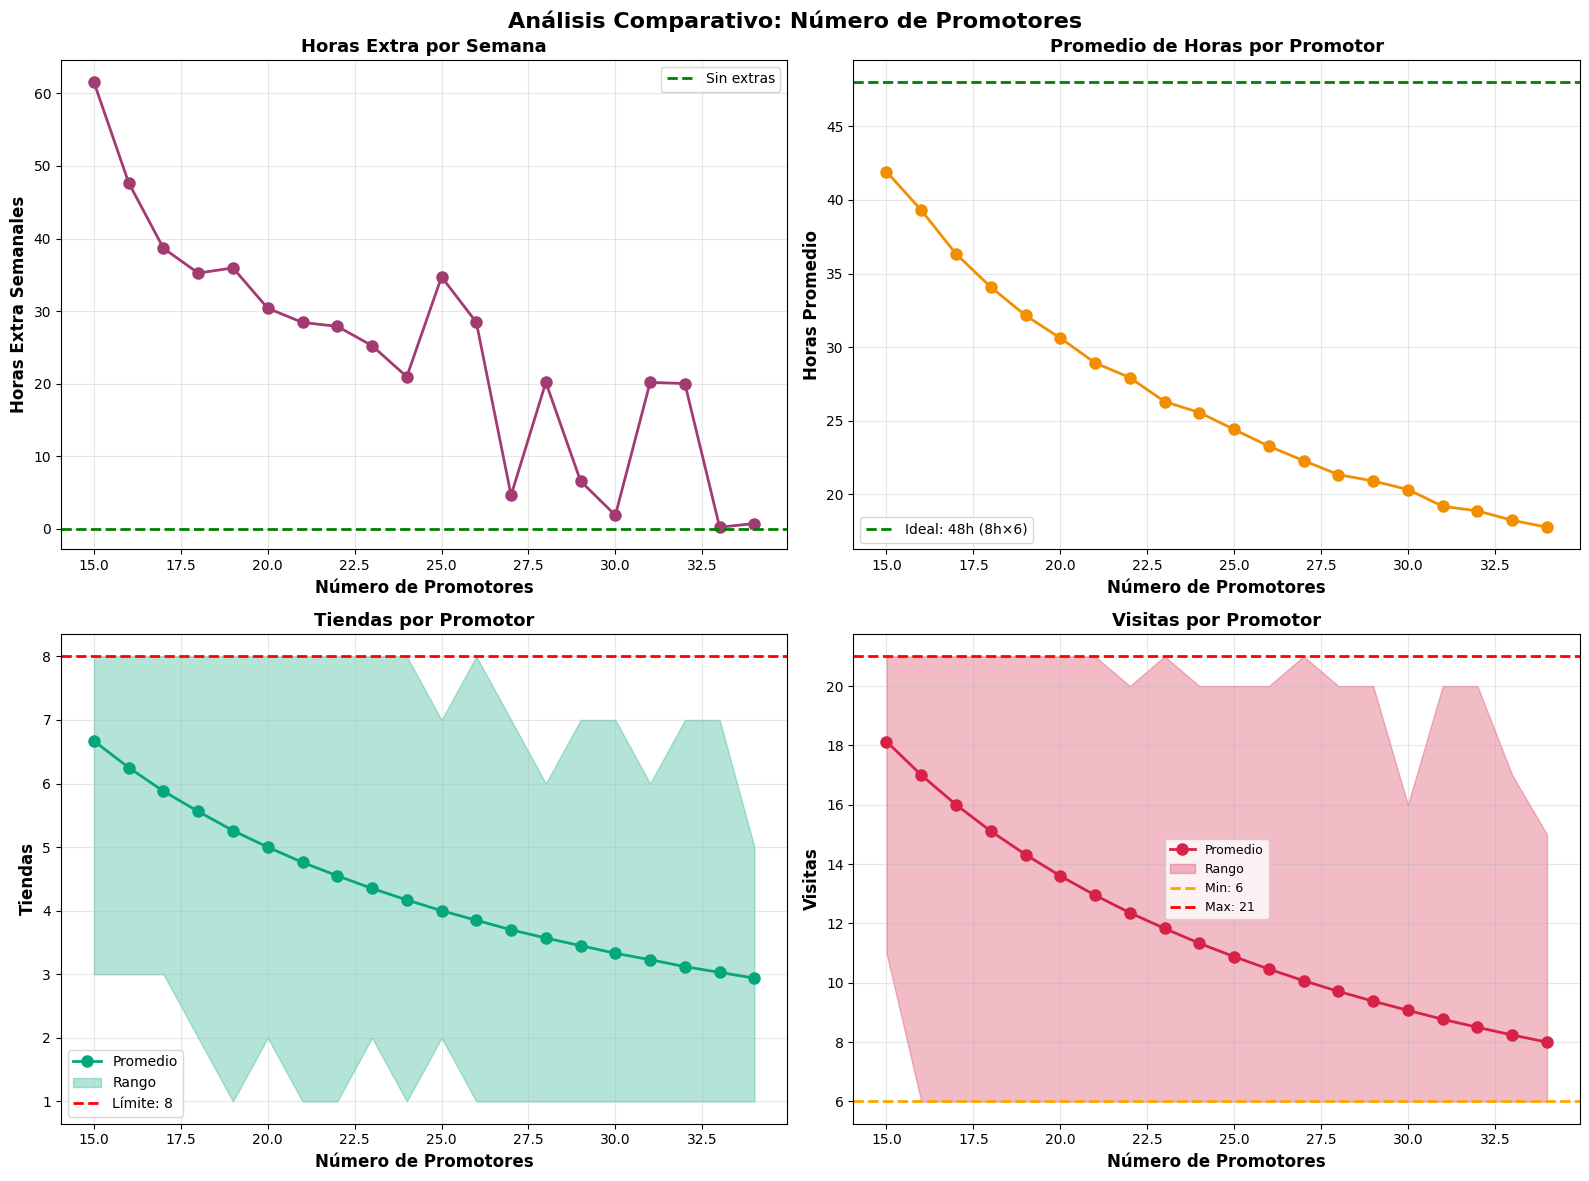


✅ ANÁLISIS COMPLETADO

Para ver los resultados nuevamente:
  - Tabla: print(df_results)
  - Resumen: print_summary(df_results)
  - Gráficos: plot_results(df_results)


In [ ]:
"""
ANÁLISIS COMPARATIVO DE PROMOTORES - VERSIÓN COMPLETA
Ejecuta automáticamente todo el análisis
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_multiple_promoters(filepath, promoter_range):
    """
    Ejecuta el código original múltiples veces variando el número de promotores.

    Args:
        filepath: ruta al CSV de tiendas
        promoter_range: lista o range con números de promotores a probar

    Returns:
        DataFrame con resultados comparativos
    """
    print("\n" + "="*70)
    print("🔄 ANÁLISIS VARIANDO NÚMERO DE PROMOTORES")
    print("="*70)

    results = []

    for n_promoters in promoter_range:
        print(f"\n{'='*70}")
        print(f"Probando con {n_promoters} promotores...")
        print(f"{'='*70}")

        try:
            # EJECUTAR EL CÓDIGO ORIGINAL COMPLETO
            stores_df, schedule, dist_matrix = solve_phase1_geographic(
                filepath,
                n_promoters=n_promoters,
                time_per_unit=18
            )

            # USAR LAS FUNCIONES ORIGINALES PARA OBTENER MÉTRICAS
            all_ok = verify_all_constraints(schedule, stores_df)
            violations = compute_daily_work_times(schedule, stores_df, dist_matrix)

            # Calcular estadísticas adicionales
            stores_per_promoter = []
            visits_per_promoter = []

            for promoter in stores_df['promoter'].unique():
                promoter_stores = stores_df[stores_df['promoter'] == promoter]
                n_stores = len(promoter_stores)
                n_visits = int(promoter_stores['initial_frequency'].sum())

                stores_per_promoter.append(n_stores)
                visits_per_promoter.append(n_visits)

            # Calcular horas totales trabajadas
            total_work_minutes = 0
            for promoter, days in schedule.items():
                for day, visits in days.items():
                    if not visits:
                        continue

                    store_ids = [v["store_id"] for v in visits]
                    visit_time = sum(v["duration"] for v in visits)

                    idx_map = {sid: stores_df[stores_df["store_id"] == sid].index[0]
                              for sid in store_ids}
                    travel_time = 0
                    for i in range(len(store_ids) - 1):
                        from_idx = idx_map[store_ids[i]]
                        to_idx = idx_map[store_ids[i + 1]]
                        travel_time += dist_matrix[from_idx][to_idx]

                    total_work_minutes += (visit_time + travel_time)

            # GUARDAR RESULTADOS
            result = {
                'n_promoters': n_promoters,
                'restricciones_ok': '✅' if all_ok else '❌',
                'horas_totales_semana': round(total_work_minutes / 60, 2),
                'horas_extra_semana': round(violations / 60, 2),
                'horas_promedio_promotor': round((total_work_minutes / 60) / n_promoters, 2),
                'horas_extra_promedio': round((violations / 60) / n_promoters, 2),
                'tiendas_min': min(stores_per_promoter) if stores_per_promoter else 0,
                'tiendas_max': max(stores_per_promoter) if stores_per_promoter else 0,
                'tiendas_promedio': round(np.mean(stores_per_promoter), 2) if stores_per_promoter else 0,
                'visitas_min': min(visits_per_promoter) if visits_per_promoter else 0,
                'visitas_max': max(visits_per_promoter) if visits_per_promoter else 0,
                'visitas_promedio': round(np.mean(visits_per_promoter), 2) if visits_per_promoter else 0,
            }

            results.append(result)

            print(f"\n📊 RESUMEN RÁPIDO:")
            print(f"   ✓ Restricciones: {result['restricciones_ok']}")
            print(f"   ✓ Horas totales: {result['horas_totales_semana']}h")
            print(f"   ✓ Horas extra: {result['horas_extra_semana']}h")
            print(f"   ✓ Promedio/promotor: {result['horas_promedio_promotor']}h")

        except Exception as e:
            print(f"❌ Error con {n_promoters} promotores: {str(e)}")
            import traceback
            traceback.print_exc()
            continue

    # Crear DataFrame con todos los resultados
    df_results = pd.DataFrame(results)

    return df_results


def plot_results(df_results):
    """Genera gráficos de los resultados."""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Análisis Comparativo: Número de Promotores',
                 fontsize=16, fontweight='bold')

    # Gráfico 1: Horas extra
    ax1 = axes[0, 0]
    ax1.plot(df_results['n_promoters'], df_results['horas_extra_semana'],
             marker='o', linewidth=2, color='#A23B72', markersize=8)
    ax1.axhline(y=0, color='green', linestyle='--', linewidth=2, label='Sin extras')
    ax1.set_xlabel('Número de Promotores', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Horas Extra Semanales', fontsize=12, fontweight='bold')
    ax1.set_title('Horas Extra por Semana', fontsize=13, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Promedio horas por promotor
    ax2 = axes[0, 1]
    ax2.plot(df_results['n_promoters'], df_results['horas_promedio_promotor'],
             marker='o', linewidth=2, color='#F18F01', markersize=8)
    ax2.axhline(y=48, color='green', linestyle='--', linewidth=2,
                label='Ideal: 48h (8h×6)')
    ax2.set_xlabel('Número de Promotores', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Horas Promedio', fontsize=12, fontweight='bold')
    ax2.set_title('Promedio de Horas por Promotor', fontsize=13, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Gráfico 3: Tiendas por promotor
    ax3 = axes[1, 0]
    ax3.plot(df_results['n_promoters'], df_results['tiendas_promedio'],
             marker='o', linewidth=2, label='Promedio', color='#06A77D', markersize=8)
    ax3.fill_between(df_results['n_promoters'],
                      df_results['tiendas_min'],
                      df_results['tiendas_max'],
                      alpha=0.3, color='#06A77D', label='Rango')
    ax3.axhline(y=8, color='red', linestyle='--', linewidth=2, label='Límite: 8')
    ax3.set_xlabel('Número de Promotores', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Tiendas', fontsize=12, fontweight='bold')
    ax3.set_title('Tiendas por Promotor', fontsize=13, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Gráfico 4: Visitas por promotor
    ax4 = axes[1, 1]
    ax4.plot(df_results['n_promoters'], df_results['visitas_promedio'],
             marker='o', linewidth=2, label='Promedio', color='#D62246', markersize=8)
    ax4.fill_between(df_results['n_promoters'],
                      df_results['visitas_min'],
                      df_results['visitas_max'],
                      alpha=0.3, color='#D62246', label='Rango')
    ax4.axhline(y=6, color='orange', linestyle='--', linewidth=2, label='Min: 6')
    ax4.axhline(y=21, color='red', linestyle='--', linewidth=2, label='Max: 21')
    ax4.set_xlabel('Número de Promotores', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Visitas', fontsize=12, fontweight='bold')
    ax4.set_title('Visitas por Promotor', fontsize=13, fontweight='bold')
    ax4.legend(fontsize=9)
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def print_summary(df_results):
    """Imprime un resumen de los resultados."""
    print("\n" + "="*70)
    print("📋 RESUMEN COMPLETO")
    print("="*70)

    # Encontrar escenarios importantes
    valid = df_results[df_results['restricciones_ok'] == '✅']

    if len(valid) > 0:
        # Mejor escenario (mínimas horas extra)
        best = valid.loc[valid['horas_extra_semana'].idxmin()]
        print(f"\n🎯 MEJOR ESCENARIO (mínimas horas extra):")
        print(f"   • Promotores: {int(best['n_promoters'])}")
        print(f"   • Horas extra: {best['horas_extra_semana']}h/semana")
        print(f"   • Promedio: {best['horas_promedio_promotor']}h/promotor")
        print(f"   • Tiendas: {int(best['tiendas_min'])}-{int(best['tiendas_max'])} (avg: {best['tiendas_promedio']})")
        print(f"   • Visitas: {int(best['visitas_min'])}-{int(best['visitas_max'])} (avg: {best['visitas_promedio']})")

    # Primer escenario sin extras
    no_extra = df_results[df_results['horas_extra_semana'] == 0]
    if len(no_extra) > 0:
        first_no_extra = no_extra.iloc[0]
        print(f"\n✨ PRIMER ESCENARIO SIN HORAS EXTRA:")
        print(f"   • Promotores: {int(first_no_extra['n_promoters'])}")
        print(f"   • Promedio: {first_no_extra['horas_promedio_promotor']}h/promotor")
    else:
        print(f"\n⚠️  Ningún escenario sin horas extra en el rango probado")

    # Tabla completa
    print(f"\n📊 TABLA COMPARATIVA:")
    print(df_results.to_string(index=False))

    # Exportar
    filename = 'analisis_promotores.csv'
    df_results.to_csv(filename, index=False)
    print(f"\n💾 Resultados guardados en: {filename}")


# ==================================================
# EJECUCIÓN AUTOMÁTICA
# ==================================================

print("\n" + "="*70)
print("🚀 INICIANDO ANÁLISIS COMPARATIVO AUTOMÁTICO")
print("="*70)

# Configuración
filepath = 'stores.csv'
promoter_range = range(15, 35)  # De 15 a 34 promotores

# Ejecutar análisis completo
print(f"\n📊 Analizando {len(list(promoter_range))} escenarios diferentes...")
print(f"    Rango: {min(promoter_range)} a {max(promoter_range)} promotores\n")

df_results = analyze_multiple_promoters(filepath, promoter_range)

# Mostrar resultados completos
print_summary(df_results)

# Generar gráficos
print("\n📈 Generando gráficos comparativos...")
plot_results(df_results)

print("\n" + "="*70)
print("✅ ANÁLISIS COMPLETADO")
print("="*70)
print("\nPara ver los resultados nuevamente:")
print("  - Tabla: print(df_results)")
print("  - Resumen: print_summary(df_results)")
print("  - Gráficos: plot_results(df_results)")

/tmp/ipython-input-3692504366.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


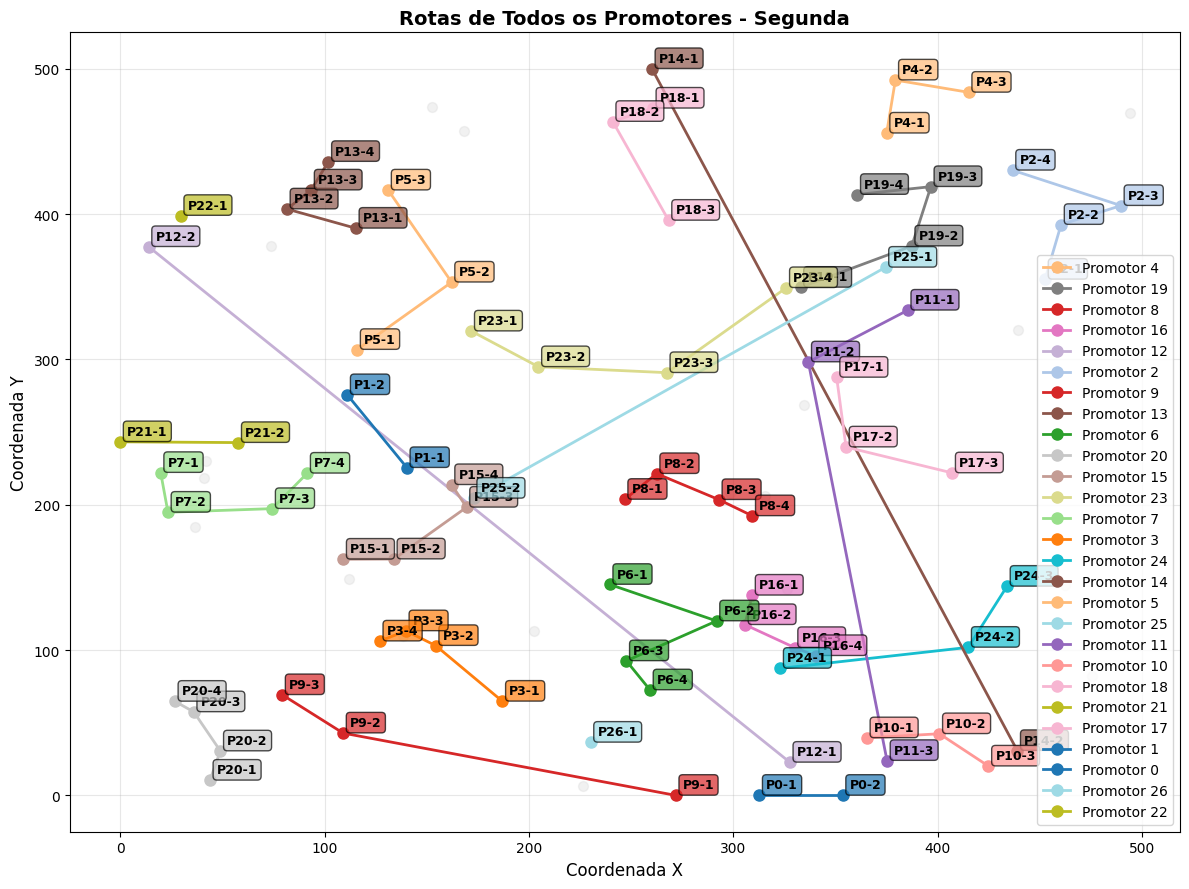

/tmp/ipython-input-3692504366.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


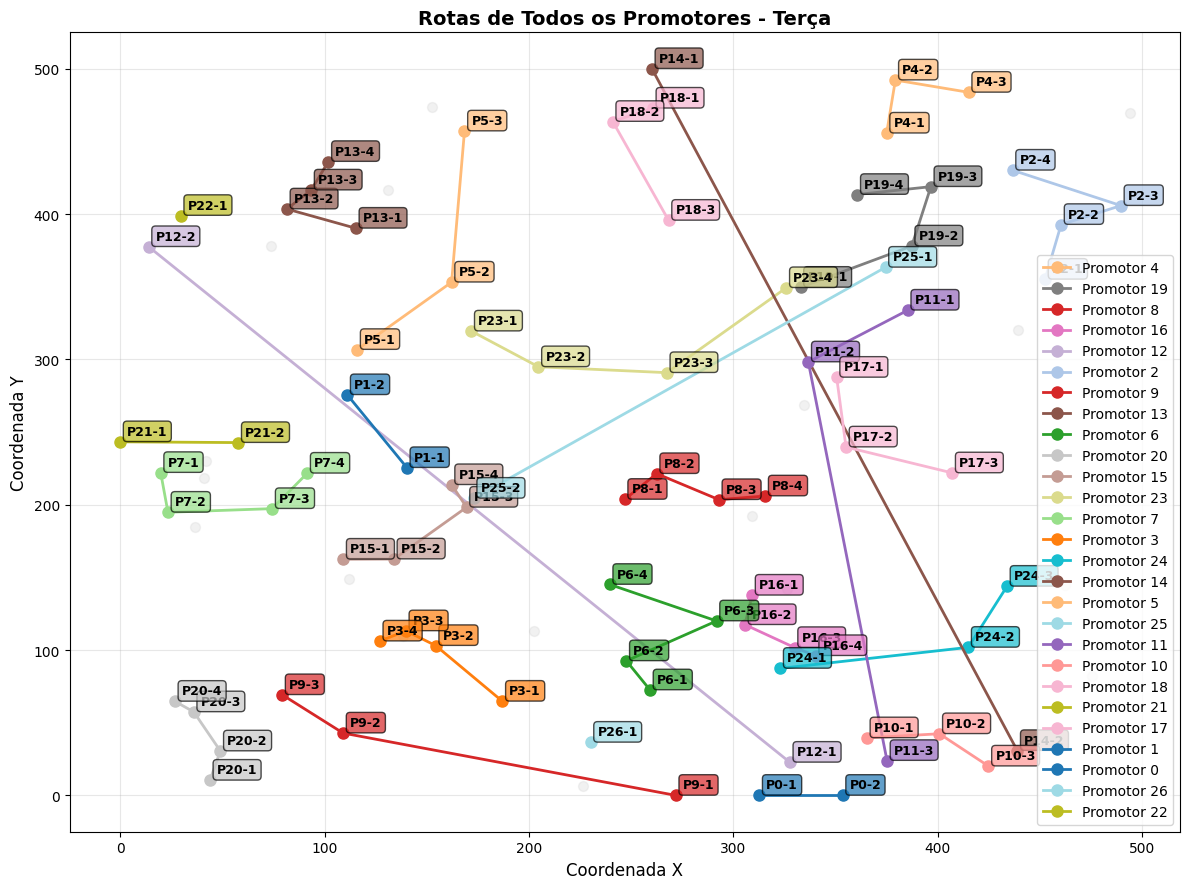

/tmp/ipython-input-3692504366.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


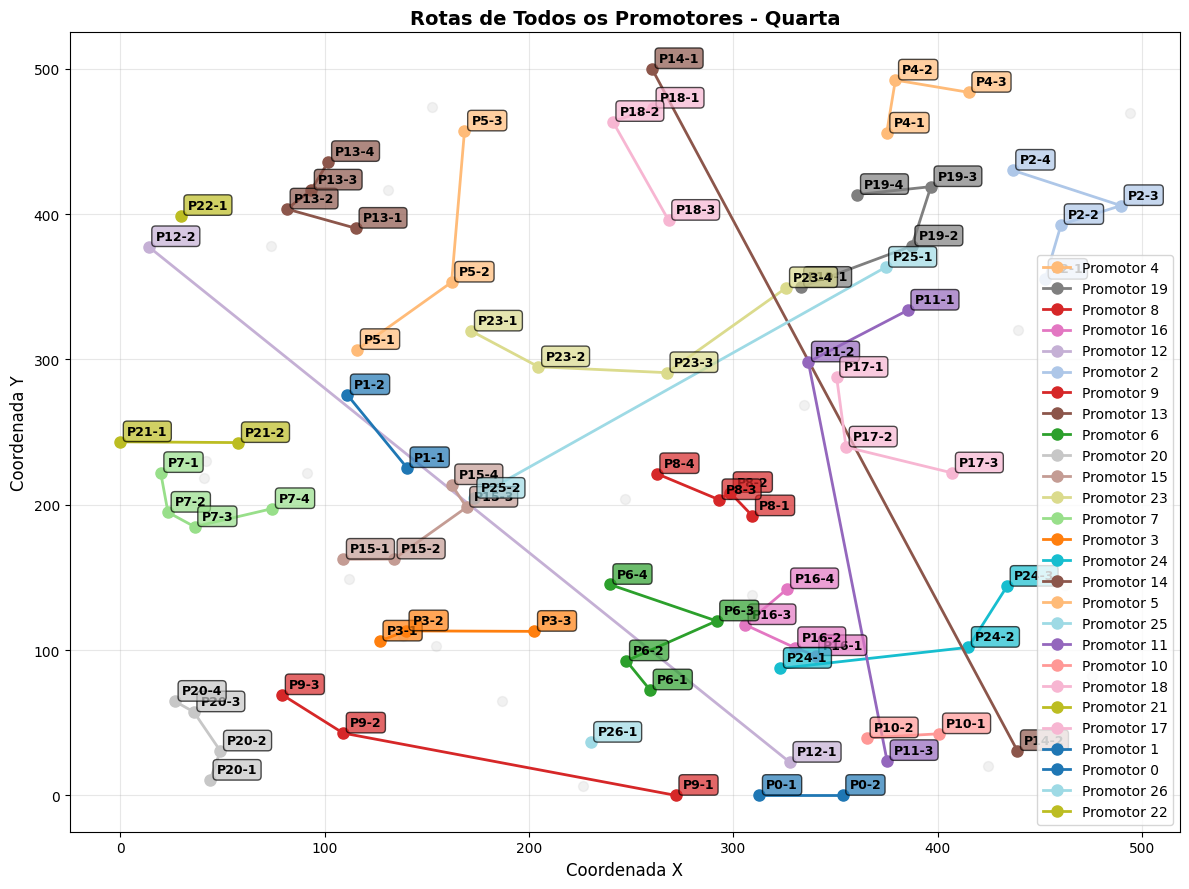

/tmp/ipython-input-3692504366.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


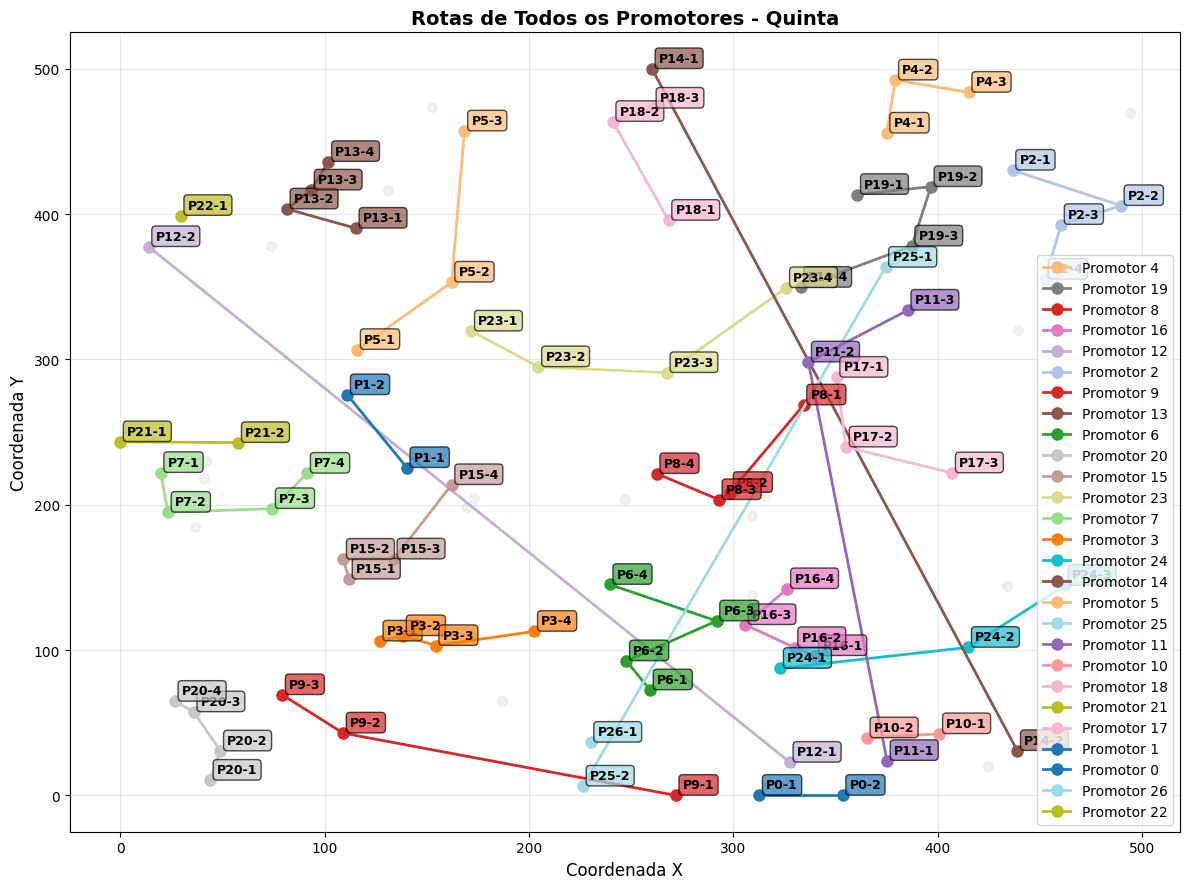

/tmp/ipython-input-3692504366.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


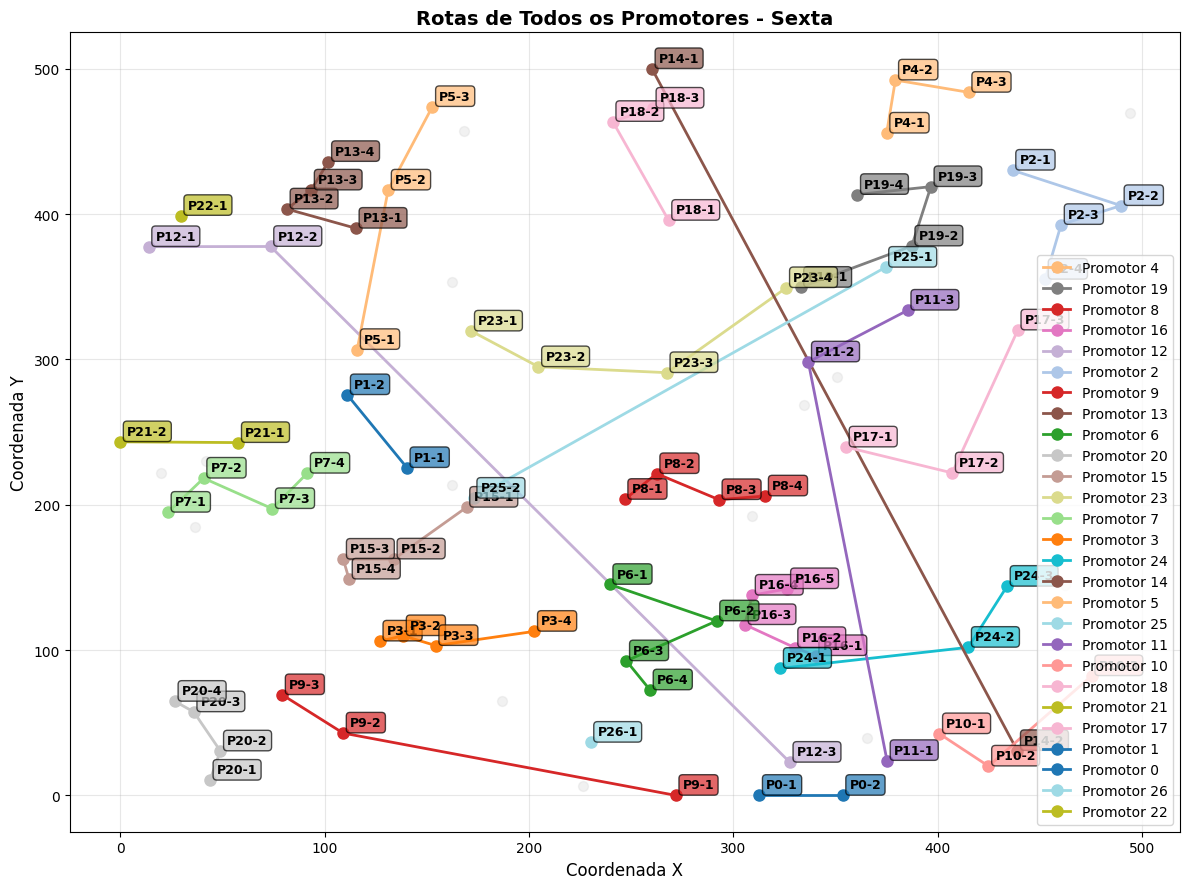

/tmp/ipython-input-3692504366.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


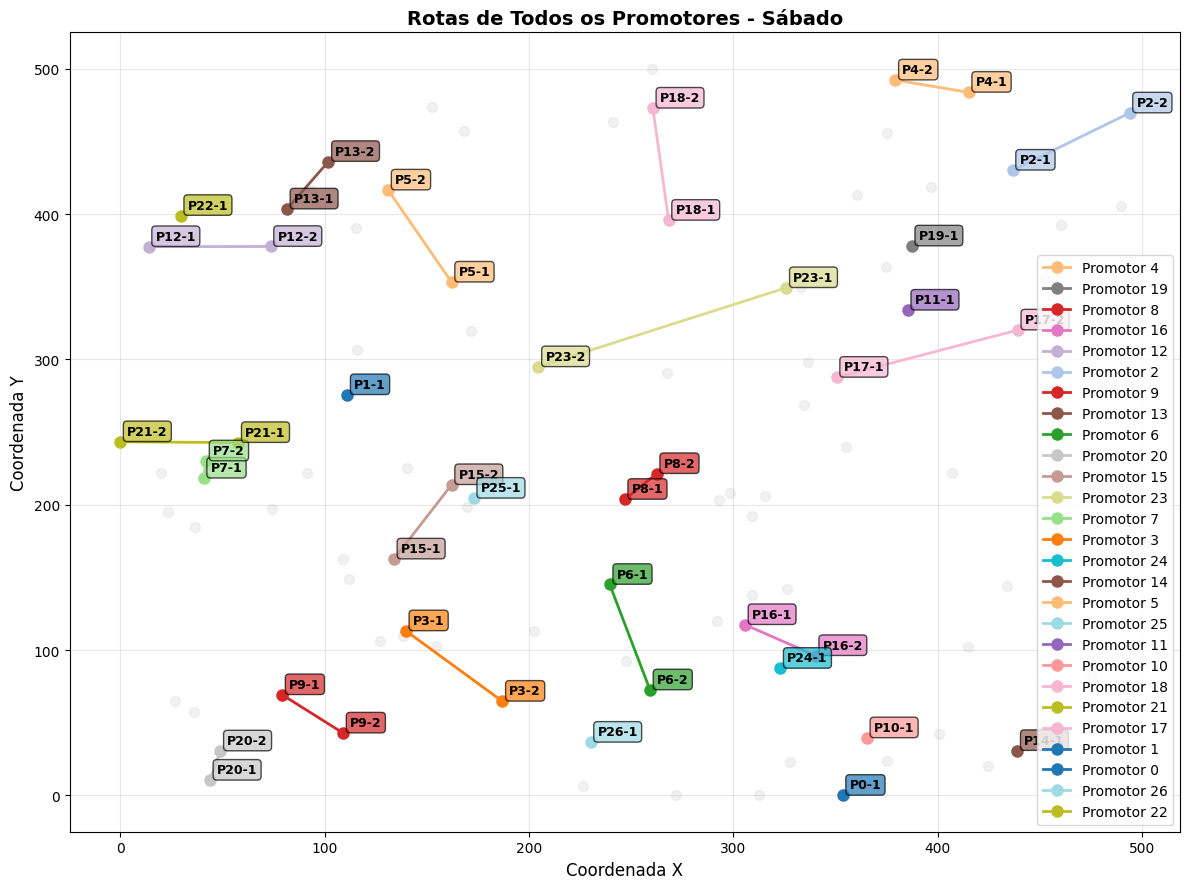


✅ Análise concluída. Arquivo gerado: relatorio_rentabilidade_analise_diaria.csv

📊 RESUMO EXECUTIVO: ANÁLISE COMPARATIVA DE RENTABILIDADE

💰 RENTABILIDADE
────────────────────────────────────────────────────────────────────────────────
  Rentabilidade Inicial:        R$39,345.00
  Rentabilidade Otimizada:      R$49,816.00
  Incremento:                   R$10,471.00  (26.6%)

⏱️  TEMPO DE TRABALHO
────────────────────────────────────────────────────────────────────────────────
  Tempo Inicial:                36,116.7 min  (601.9 hrs)
  Tempo Otimizado:              57,186.0 min  (953.1 hrs)
  Incremento:                   21,069.2 min  (351.2 hrs)

⚠️  HORAS EXTRAS
────────────────────────────────────────────────────────────────────────────────
  Horas Extras Iniciais:        277.3 min  (4.6 hrs)
  Horas Extras Otimizadas:      277.3 min  (4.6 hrs)
  ✅ Sem mudanças               (0.0 hrs)

🏪 COBERTURA DE LOJAS
────────────────────────────────────────────────────────────────────────────

In [ ]:
import pandas as pd
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ==================================================
# FUNÇÕES AUXILIARES
# ==================================================

def get_profitability_for_frequency(store_row, frequency):
    """Obtém a rentabilidade correta de acordo com a frequência de visitas."""
    freq = int(frequency)
    if freq < 1:
        freq = 1
    elif freq > 6:
        freq = 6

    col_name = f'profitability_freq_{freq}'

    if col_name in store_row.index:
        return store_row[col_name]
    else:
        return store_row.get('baseline_profitability', 0)


def calculate_day_metrics(visits, stores_df, distance_matrix):
    """
    Calcula métricas detalhadas para um dia específico.

    Retorna:
        dict com: store_ids, num_visits, visit_time, travel_time, total_time
    """
    if not visits:
        return {
            'store_ids': [],
            'num_visits': 0,
            'visit_time': 0,
            'travel_time': 0,
            'total_time': 0
        }

    store_ids = [v['store_id'] for v in visits]
    visit_time = sum(v['duration'] for v in visits)

    # Calcular tempo de deslocamento
    idx_map = {sid: stores_df[stores_df['store_id'] == sid].index[0]
              for sid in store_ids}

    travel_time = 0
    for i in range(len(store_ids) - 1):
        from_idx = idx_map[store_ids[i]]
        to_idx = idx_map[store_ids[i + 1]]
        travel_time += distance_matrix[from_idx][to_idx]

    return {
        'store_ids': store_ids,
        'num_visits': len(visits),
        'visit_time': visit_time,
        'travel_time': travel_time,
        'total_time': visit_time + travel_time
    }


def solve_tsp_bruteforce_quick(store_ids, distance_matrix, stores_df, closed=False):
    """Versão rápida do TSP por força bruta."""
    if len(store_ids) <= 1:
        return store_ids

    store_to_df_idx = {}
    for sid in store_ids:
        matching_rows = stores_df[stores_df['store_id'] == sid]
        if len(matching_rows) > 0:
            store_to_df_idx[sid] = matching_rows.index[0]

    df_indices = [store_to_df_idx[sid] for sid in store_ids]

    best_distance = float('inf')
    best_route_indices = None

    for perm in permutations(df_indices):
        route = list(perm)
        distance = 0

        for i in range(len(route) - 1):
            distance += distance_matrix[route[i], route[i + 1]]

        if closed and len(route) > 1:
            distance += distance_matrix[route[-1], route[0]]

        if distance < best_distance:
            best_distance = distance
            best_route_indices = route

    df_idx_to_store = {v: k for k, v in store_to_df_idx.items()}
    optimal_store_ids = [df_idx_to_store[idx] for idx in best_route_indices]

    return optimal_store_ids


# ==================================================
# VISUALIZAÇÃO DE ROTAS
# ==================================================

def plot_all_routes_for_day(stores_df, schedule, day, day_names):
    """Plota as rotas de todos os promotores para um dia específico."""
    plt.figure(figsize=(12, 9))
    colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)

    has_routes = False

    for promoter_id, days in schedule.items():
        visits = days.get(day, [])
        if not visits:
            continue

        has_routes = True
        store_ids = [v['store_id'] for v in visits]
        coords = stores_df.set_index("store_id").loc[store_ids][
            ["x_coordinate", "y_coordinate"]].values

        plt.plot(coords[:, 0], coords[:, 1], marker='o', markersize=8,
                linestyle='-', linewidth=2, label=f"Promotor {promoter_id}",
                color=colors(promoter_id))

        for i, (x, y) in enumerate(coords):
            plt.annotate(f"P{promoter_id}-{i+1}", xy=(x, y),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3',
                                facecolor=colors(promoter_id), alpha=0.7))

    # Todas as lojas como fundo
    all_coords = stores_df[['x_coordinate', 'y_coordinate']].values
    plt.scatter(all_coords[:, 0], all_coords[:, 1],
               c='lightgray', s=50, alpha=0.3, zorder=0)

    plt.title(f"Rotas de Todos os Promotores - {day_names[day]}",
             fontsize=14, fontweight='bold')
    plt.xlabel("Coordenada X", fontsize=12)
    plt.ylabel("Coordenada Y", fontsize=12)
    plt.grid(True, alpha=0.3)
    if has_routes:
        plt.legend(loc='best', fontsize=10)
    plt.tight_layout()
    plt.show()


# ==================================================
# MAXIMIZAÇÃO COM TABELAS MELHORADAS
# ==================================================

def maximize_profitability_with_tables(schedule, stores_df, distance_matrix,
                                       days_available=[480, 480, 480, 480, 480, 240],
                                       closed_tsp=False):
    """
    Maximiza a rentabilidade e gera relatórios tabulares detalhados com tempos de deslocamento.
    """

    # Criar cópia do schedule
    improved_schedule = {p: {d: list(visits) for d, visits in days.items()}
                        for p, days in schedule.items()}

    day_names = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']

    # Lista para armazenar dados das tabelas
    all_tables_data = []

    # Para cada promotor
    for promoter in sorted(improved_schedule.keys()):
        promoter_stores = stores_df[stores_df['promoter'] == promoter].copy()

        promoter_data = []

        # Para cada dia
        for day in range(6):
            visits = improved_schedule[promoter][day]
            limit = days_available[day]

            # === ANTES: Calcular métricas originais ===
            original_metrics = calculate_day_metrics(visits, stores_df, distance_matrix)
            original_stores = original_metrics['store_ids']
            original_time = original_metrics['total_time']
            original_visit_time = original_metrics['visit_time']
            original_travel_time = original_metrics['travel_time']
            free_time = limit - original_time

            # === PROCESSO: Adicionar novas visitas ===
            new_stores_added = []
            time_used_new = 0

            if free_time > 0 and visits:
                visited_today = set(original_stores)
                available_stores = promoter_stores[
                    ~promoter_stores['store_id'].isin(visited_today)
                ].copy()

                if len(available_stores) > 0:
                    freq_counts = {}
                    for _, store in available_stores.iterrows():
                        sid = store['store_id']
                        current_freq = sum(1 for d in improved_schedule[promoter].values()
                                         for v in d if v['store_id'] == sid)
                        freq_counts[sid] = current_freq

                    available_stores['future_frequency'] = available_stores['store_id'].map(
                        lambda sid: freq_counts.get(sid, 0) + 1
                    )
                    available_stores['expected_profitability'] = available_stores.apply(
                        lambda row: get_profitability_for_frequency(row, row['future_frequency']),
                        axis=1
                    )

                    available_stores = available_stores.sort_values(
                        'expected_profitability', ascending=False
                    )

                    new_visits = []

                    for _, store in available_stores.iterrows():
                        visit_duration = store['visit_duration_minutes']

                        if new_visits:
                            last_store_id = new_visits[-1]['store_id']
                        else:
                            last_store_id = visits[-1]['store_id']

                        last_idx = stores_df[stores_df['store_id'] == last_store_id].index[0]
                        current_idx = store.name
                        estimated_travel = distance_matrix[last_idx][current_idx]

                        total_new_time = visit_duration + estimated_travel

                        if time_used_new + total_new_time <= free_time:
                            new_visit = {
                                'store_id': store['store_id'],
                                'duration': visit_duration,
                                'frequency': 1,
                                'visit_num': 1,
                                'total_freq': 1,
                                'expected_profitability': store['expected_profitability'],
                                'is_extra': True
                            }
                            new_visits.append(new_visit)
                            new_stores_added.append(store['store_id'])
                            time_used_new += total_new_time
                        else:
                            break

                    if new_visits:
                        improved_schedule[promoter][day].extend(new_visits)

                        all_visits = improved_schedule[promoter][day]
                        all_store_ids = [v['store_id'] for v in all_visits]

                        optimal_route = solve_tsp_bruteforce_quick(
                            all_store_ids, distance_matrix, stores_df, closed=closed_tsp
                        )

                        optimized_visits = []
                        for sid in optimal_route:
                            visit = next(v for v in all_visits if v['store_id'] == sid)
                            optimized_visits.append(visit)

                        improved_schedule[promoter][day] = optimized_visits

            # === DEPOIS: Calcular métricas finais ===
            final_metrics = calculate_day_metrics(
                improved_schedule[promoter][day], stores_df, distance_matrix
            )
            final_stores = final_metrics['store_ids']
            final_time = final_metrics['total_time']
            final_visit_time = final_metrics['visit_time']
            final_travel_time = final_metrics['travel_time']
            final_free = limit - final_time

            # Determinar estado
            if final_time > limit:
                estado = f'❌ Excede {round(final_time - limit, 1)} min'
            else:
                estado = f'✅ Livre {round(limit - final_time, 1)} min'

            original_str = '\n'.join(original_stores) if original_stores else '-'
            novas_str = '\n'.join(new_stores_added) if new_stores_added else '-'
            rota_final_str = '\n'.join(final_stores) if final_stores else '-'

            promoter_data.append({
                'Dia': day_names[day],
                'Lojas\nOriginais': original_str,
                'T.Visit\nOrig (min)': round(original_visit_time, 1),
                'T.Viagem\nOrig (min)': round(original_travel_time, 1),
                'Novas\nLojas': novas_str,
                'Rota\nFinal': rota_final_str,
                'T.Visit\nFinal (min)': round(final_visit_time, 1),
                'T.Viagem\nFinal (min)': round(final_travel_time, 1),
                'T.Total\n(min)': round(final_time, 1),
                'Limite\n(min)': limit,
                'Estado': estado
            })

        df_promoter = pd.DataFrame(promoter_data)

        total_novas = sum(1 for row in promoter_data if row['Novas\nLojas'] != '-')
        total_time_used = sum(row['T.Total\n(min)'] -
                             (df_promoter.iloc[i]['T.Visit\nOrig (min)'] +
                              df_promoter.iloc[i]['T.Viagem\nOrig (min)'])
                             for i, row in enumerate(promoter_data))

        all_tables_data.append({
            'promoter': promoter,
            'data': promoter_data,
            'days_improved': total_novas,
            'time_used': total_time_used
        })

    return improved_schedule, all_tables_data


# ==================================================
# EXPORTAÇÃO CSV SIMPLIFICADA
# ==================================================

def export_tables_to_csv_with_preview(tables_data, improved_schedule, stores_df, distance_matrix,
                                      base_filename='relatorio_rentabilidade'):
    """
    Exporta a análise diária detalhada para CSV.
    """

    day_names = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
    days_available = [480, 480, 480, 480, 480, 240]

    daily_analysis = []
    for table_info in tables_data:
        promoter = table_info['promoter']
        for row in table_info['data']:
            daily_analysis.append({
                'Promotor': promoter,
                'Dia': row['Dia'],
                'Lojas_Originais': row['Lojas\nOriginais'].replace('\n', ', '),
                'Num_Lojas_Orig': len(row['Lojas\nOriginais'].split('\n')) if row['Lojas\nOriginais'] != '-' else 0,
                'T_Visit_Orig_min': row['T.Visit\nOrig (min)'],
                'T_Viagem_Orig_min': row['T.Viagem\nOrig (min)'],
                'T_Total_Orig_min': row['T.Visit\nOrig (min)'] + row['T.Viagem\nOrig (min)'],
                'T_Livre_Orig_min': round(row['Limite\n(min)'] - (row['T.Visit\nOrig (min)'] + row['T.Viagem\nOrig (min)']), 1),
                'Novas_Lojas': row['Novas\nLojas'].replace('\n', ', '),
                'Num_Novas': len(row['Novas\nLojas'].split('\n')) if row['Novas\nLojas'] != '-' else 0,
                'Rota_Final': row['Rota\nFinal'].replace('\n', ' → '),
                'Num_Lojas_Final': len(row['Rota\nFinal'].split('\n')) if row['Rota\nFinal'] != '-' else 0,
                'T_Visit_Final_min': row['T.Visit\nFinal (min)'],
                'T_Viagem_Final_min': row['T.Viagem\nFinal (min)'],
                'T_Total_Final_min': row['T.Total\n(min)'],
                'Limite_Diario_min': row['Limite\n(min)'],
                'T_Livre_Final_min': round(row['Limite\n(min)'] - row['T.Total\n(min)'], 1),
                'Utilizacao_porcentagem': round((row['T.Total\n(min)'] / row['Limite\n(min)']) * 100, 1),
                'Estado': row['Estado'].replace('✅ ', '').replace('❌ ', ''),
                'Melhoria_Realizada': 'Sim' if row['Novas\nLojas'] != '-' else 'Não'
            })

    df_daily = pd.DataFrame(daily_analysis)
    daily_file = f'{base_filename}_analise_diaria.csv'
    df_daily.to_csv(daily_file, index=False, encoding='utf-8-sig')

    return daily_file


# ==================================================
# FUNÇÃO PRINCIPAL
# ==================================================

def run_profit_maximization_with_csv_preview(stores_df, schedule, distance_matrix):
    """
    Executa o processo completo com geração de CSV e visualização das rotas.
    """

    improved_schedule, tables_data = maximize_profitability_with_tables(
        schedule, stores_df, distance_matrix
    )

    csv_file = export_tables_to_csv_with_preview(
        tables_data, improved_schedule, stores_df, distance_matrix
    )

    day_names = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
    for day in range(6):
        plot_all_routes_for_day(stores_df, improved_schedule, day, day_names)

    print(f"\n✅ Análise concluída. Arquivo gerado: {csv_file}")

    return improved_schedule, csv_file


# ==================================================
# ANÁLISE COMPARATIVA DE RENTABILIDADE
# ==================================================

def calculate_profitability_comparison(original_schedule, improved_schedule, stores_df, distance_matrix):
    """
    Calcula e compara a rentabilidade antes e depois da otimização.
    """

    def calculate_schedule_profitability(schedule):
        """Calcula rentabilidade total de um schedule."""
        total_profitability = 0
        frequency_count = {}

        for promoter in schedule:
            for day in schedule[promoter]:
                for visit in schedule[promoter][day]:
                    store_id = visit['store_id']
                    frequency_count[store_id] = frequency_count.get(store_id, 0) + 1

        for store_id, freq in frequency_count.items():
            store_row = stores_df[stores_df['store_id'] == store_id].iloc[0]
            profit = get_profitability_for_frequency(store_row, freq)
            total_profitability += profit

        return total_profitability, frequency_count

    def calculate_schedule_metrics(schedule):
        """Calcula métricas de tempo e horas extras."""
        days_available = [480, 480, 480, 480, 480, 240]
        total_time = 0
        overtime_minutes = 0

        for promoter in schedule:
            for day in range(6):
                visits = schedule[promoter][day]
                if visits:
                    metrics = calculate_day_metrics(visits, stores_df, distance_matrix)
                    day_time = metrics['total_time']
                    total_time += day_time

                    if day_time > days_available[day]:
                        overtime_minutes += (day_time - days_available[day])

        return total_time, overtime_minutes

    profit_before, freq_before = calculate_schedule_profitability(original_schedule)
    profit_after, freq_after = calculate_schedule_profitability(improved_schedule)

    time_before, overtime_before = calculate_schedule_metrics(original_schedule)
    time_after, overtime_after = calculate_schedule_metrics(improved_schedule)

    profit_increase = profit_after - profit_before
    profit_increase_pct = (profit_increase / profit_before * 100) if profit_before > 0 else 0

    time_increase = time_after - time_before
    overtime_increase = overtime_after - overtime_before

    visits_before = sum(freq_before.values())
    visits_after = sum(freq_after.values())

    return {
        'profit_before': profit_before,
        'profit_after': profit_after,
        'profit_increase': profit_increase,
        'profit_increase_pct': profit_increase_pct,
        'time_before_min': time_before,
        'time_after_min': time_after,
        'time_increase_min': time_increase,
        'time_before_hrs': time_before / 60,
        'time_after_hrs': time_after / 60,
        'time_increase_hrs': time_increase / 60,
        'overtime_before_min': overtime_before,
        'overtime_after_min': overtime_after,
        'overtime_increase_min': overtime_increase,
        'overtime_before_hrs': overtime_before / 60,
        'overtime_after_hrs': overtime_after / 60,
        'overtime_increase_hrs': overtime_increase / 60,
        'unique_stores_before': len(freq_before),
        'unique_stores_after': len(freq_after),
        'new_stores_added': len(freq_after) - len(freq_before)
    }


def display_profitability_summary(comparison):
    """
    Exibe um resumo executivo da comparação de rentabilidade.
    """
    print("\n" + "="*80)
    print("📊 RESUMO EXECUTIVO: ANÁLISE COMPARATIVA DE RENTABILIDADE")
    print("="*80)

    print("\n💰 RENTABILIDADE")
    print("─" * 80)
    print(f"  Rentabilidade Inicial:        R${comparison['profit_before']:,.2f}")
    print(f"  Rentabilidade Otimizada:      R${comparison['profit_after']:,.2f}")
    print(f"  Incremento:                   R${comparison['profit_increase']:,.2f}  ({comparison['profit_increase_pct']:.1f}%)")

    print("\n⏱️  TEMPO DE TRABALHO")
    print("─" * 80)
    print(f"  Tempo Inicial:                {comparison['time_before_min']:,.1f} min  ({comparison['time_before_hrs']:.1f} hrs)")
    print(f"  Tempo Otimizado:              {comparison['time_after_min']:,.1f} min  ({comparison['time_after_hrs']:.1f} hrs)")
    print(f"  Incremento:                   {comparison['time_increase_min']:,.1f} min  ({comparison['time_increase_hrs']:.1f} hrs)")

    print("\n⚠️  HORAS EXTRAS")
    print("─" * 80)
    print(f"  Horas Extras Iniciais:        {comparison['overtime_before_min']:,.1f} min  ({comparison['overtime_before_hrs']:.1f} hrs)")
    print(f"  Horas Extras Otimizadas:      {comparison['overtime_after_min']:,.1f} min  ({comparison['overtime_after_hrs']:.1f} hrs)")

    if comparison['overtime_increase_min'] > 0:
        print(f"  ⚠️  Aumento:                   {comparison['overtime_increase_min']:,.1f} min  ({comparison['overtime_increase_hrs']:.1f} hrs)")
    elif comparison['overtime_increase_min'] < 0:
        print(f"  ✅ Redução:                   {abs(comparison['overtime_increase_min']):,.1f} min  ({abs(comparison['overtime_increase_hrs']):.1f} hrs)")
    else:
        print(f"  ✅ Sem mudanças               (0.0 hrs)")

    print("\n🏪 COBERTURA DE LOJAS")
    print("─" * 80)
    print(f"  Lojas Visitadas Inicialmente: {comparison['unique_stores_before']}")
    print(f"  Lojas Visitadas ao Final:     {comparison['unique_stores_after']}")
    print(f"  Novas Lojas Adicionadas:      {comparison['new_stores_added']}")

    print("\n" + "="*80)

    roi = (comparison['profit_increase'] / (comparison['time_increase_hrs'] if comparison['time_increase_hrs'] > 0 else 1))

    print("📈 INDICADORES DE EFICIÊNCIA")
    print("─" * 80)
    print(f"  ROI por Hora Adicional:       R${roi:,.2f}/hr")

    if comparison['overtime_increase_hrs'] <= 0:
        print(f"  Estado das Horas Extras:      ✅ MELHORADO (redução ou sem alterações)")
    else:
        print(f"  Estado das Horas Extras:      ⚠️ AUMENTO (+{comparison['overtime_increase_hrs']:.1f} hrs)")

    print("="*80 + "\n")


def generate_store_frequency_table(original_schedule, improved_schedule, stores_df):
    """
    Gera uma tabela detalhada mostrando frequências e ganhos por loja.
    """
    freq_before = {}
    for promoter in original_schedule:
        for day in original_schedule[promoter]:
            for visit in original_schedule[promoter][day]:
                store_id = visit['store_id']
                freq_before[store_id] = freq_before.get(store_id, 0) + 1

    freq_after = {}
    for promoter in improved_schedule:
        for day in improved_schedule[promoter]:
            for visit in improved_schedule[promoter][day]:
                store_id = visit['store_id']
                freq_after[store_id] = freq_after.get(store_id, 0) + 1

    all_stores = set(list(freq_before.keys()) + list(freq_after.keys()))

    table_data = []
    for store_id in sorted(all_stores):
        store_row = stores_df[stores_df['store_id'] == store_id].iloc[0]

        freq_orig = freq_before.get(store_id, 0)
        freq_new = freq_after.get(store_id, 0)

        profit_before = get_profitability_for_frequency(store_row, freq_orig) if freq_orig > 0 else 0
        profit_after = get_profitability_for_frequency(store_row, freq_new) if freq_new > 0 else 0
        profit_change = profit_after - profit_before

        if freq_new > freq_orig:
            estado = "📈 Aumentou"
        elif freq_new < freq_orig:
            estado = "📉 Diminuiu"
        elif freq_new == 0:
            estado = "➖ Sem visitas"
        else:
            estado = "➡️  Sem mudança"

        table_data.append({
            'Loja': store_id,
            'Promotor': store_row['promoter'],
            'Freq_Anterior': freq_orig,
            'Freq_Nova': freq_new,
            'Mudança_Freq': freq_new - freq_orig,
            'Ganho_Anterior': round(profit_before, 2),
            'Ganho_Novo': round(profit_after, 2),
            'Incremento_Ganho': round(profit_change, 2),
            'Estado': estado
        })

    df_table = pd.DataFrame(table_data)
    df_table = df_table.sort_values('Incremento_Ganho', ascending=False)

    return df_table


def display_store_frequency_table(df_table):
    """
    Exibe a tabela de frequências e ganhos por loja.
    """
    print("\n" + "="*120)
    print("🏪 ANÁLISE DETALHADA POR LOJA: FREQUÊNCIAS E GANHOS")
    print("="*120)

    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_columns', None)

    print("\n" + df_table.to_string(index=False))

    print("\n" + "─"*120)
    print("📊 RESUMO")
    print("─"*120)

    lojas_aumentaram = len(df_table[df_table['Mudança_Freq'] > 0])
    lojas_diminuiram = len(df_table[df_table['Mudança_Freq'] < 0])
    lojas_sem_mudança = len(df_table[df_table['Mudança_Freq'] == 0]) - len(df_table[(df_table['Freq_Anterior'] == 0) & (df_table['Freq_Nova'] == 0)])
    lojas_novas = len(df_table[(df_table['Freq_Anterior'] == 0) & (df_table['Freq_Nova'] > 0)])

    print(f"  📈 Lojas com frequência aumentada:     {lojas_aumentaram}")
    print(f"  📉 Lojas com frequência diminuída:     {lojas_diminuiram}")
    print(f"  ➡️  Lojas sem mudança de frequência:    {lojas_sem_mudança}")
    print(f"  ✨ Lojas novas adicionadas:            {lojas_novas}")
    print(f"  💰 Incremento total de ganho:          R${df_table['Incremento_Ganho'].sum():,.2f}")

    print("="*120 + "\n")

    return df_table


# ==================================================
# EXECUÇÃO AUTOMÁTICA
# ==================================================

try:
    _ = stores_df
    _ = schedule
    _ = dist_matrix

    original_schedule = {p: {d: list(visits) for d, visits in days.items()}
                        for p, days in schedule.items()}

    improved_schedule, csv_file = run_profit_maximization_with_csv_preview(
        stores_df, schedule, dist_matrix
    )

    comparison = calculate_profitability_comparison(original_schedule, improved_schedule, stores_df, dist_matrix)
    display_profitability_summary(comparison)

    df_frequency_table = generate_store_frequency_table(original_schedule, improved_schedule, stores_df)
    display_store_frequency_table(df_frequency_table)

except NameError:
    print("\n⚠️  AGUARDANDO VARIÁVEIS DO CÓDIGO PRINCIPAL")
    print("Execute primeiro as células anteriores com solve_phase1_geographic()")


/tmp/ipython-input-2559434787.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


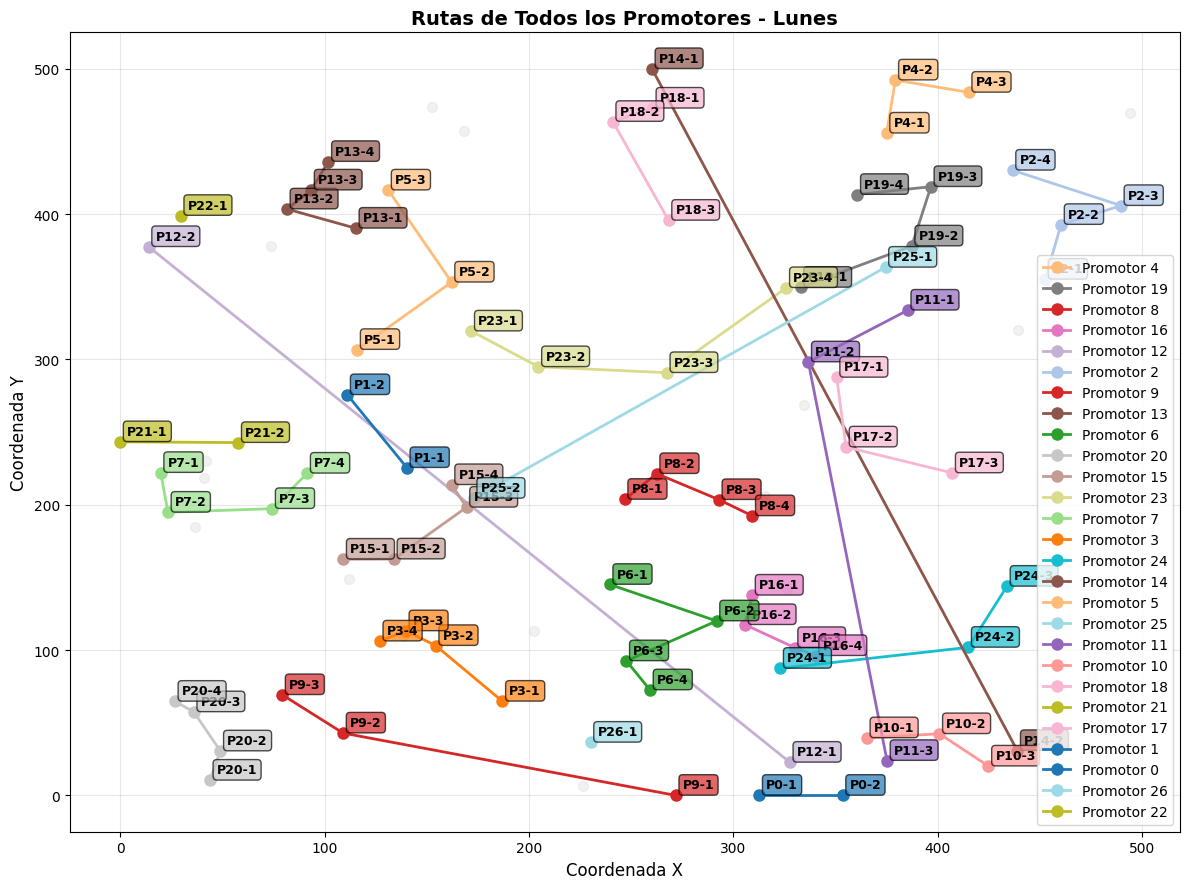

/tmp/ipython-input-2559434787.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


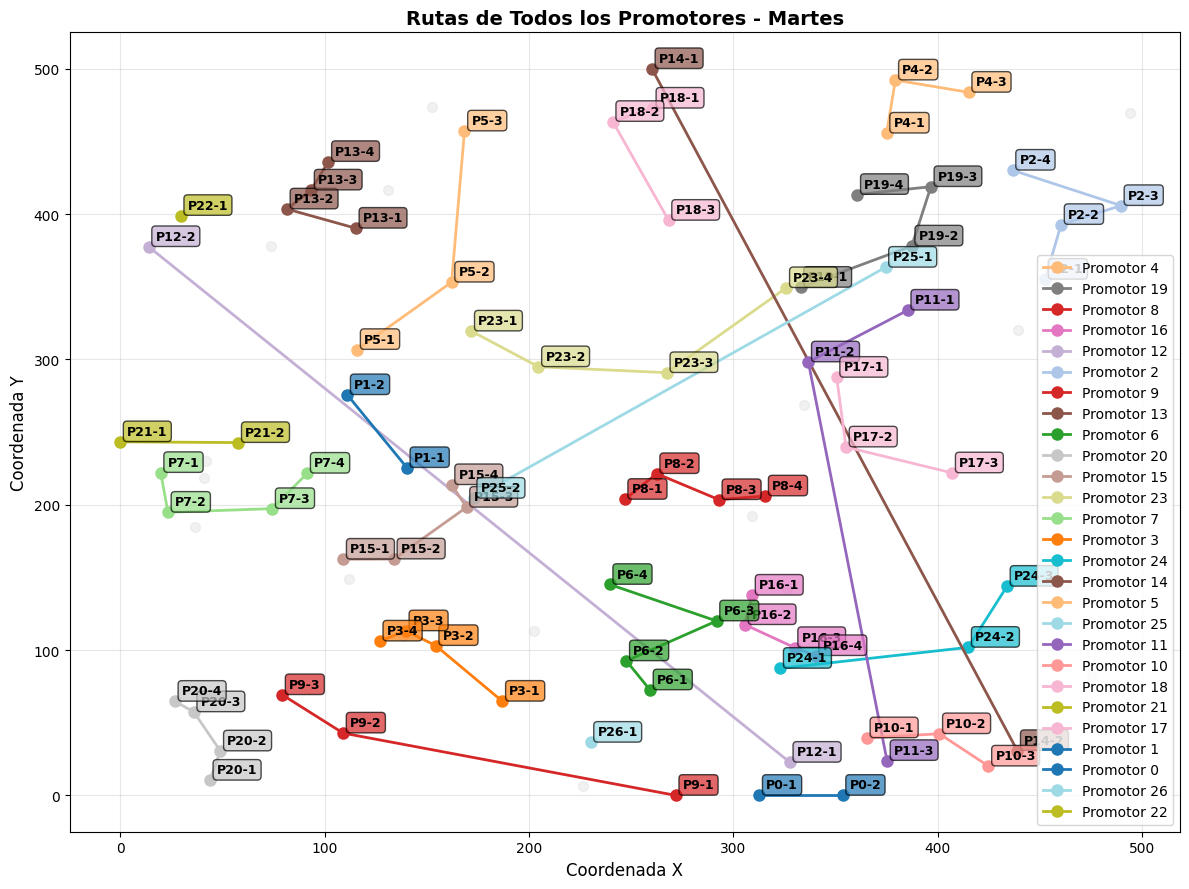

/tmp/ipython-input-2559434787.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


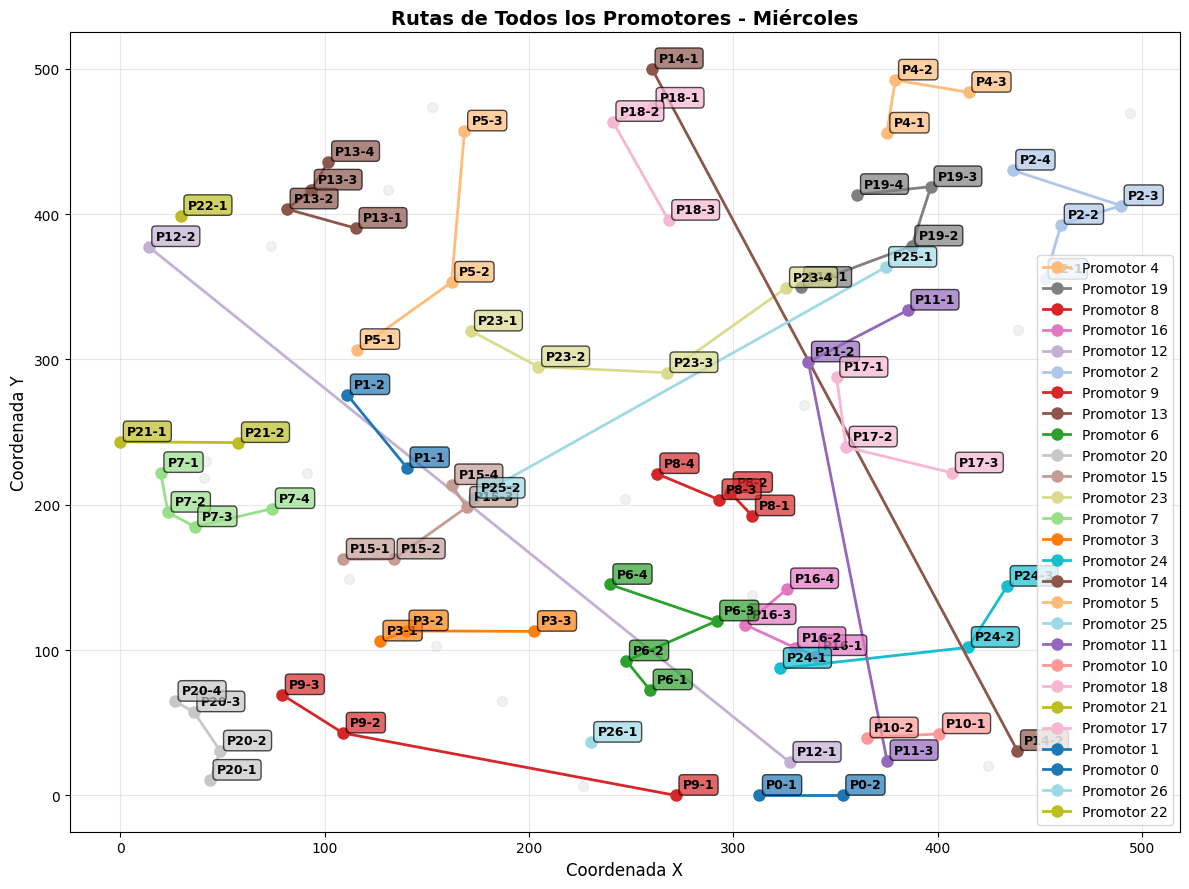

/tmp/ipython-input-2559434787.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


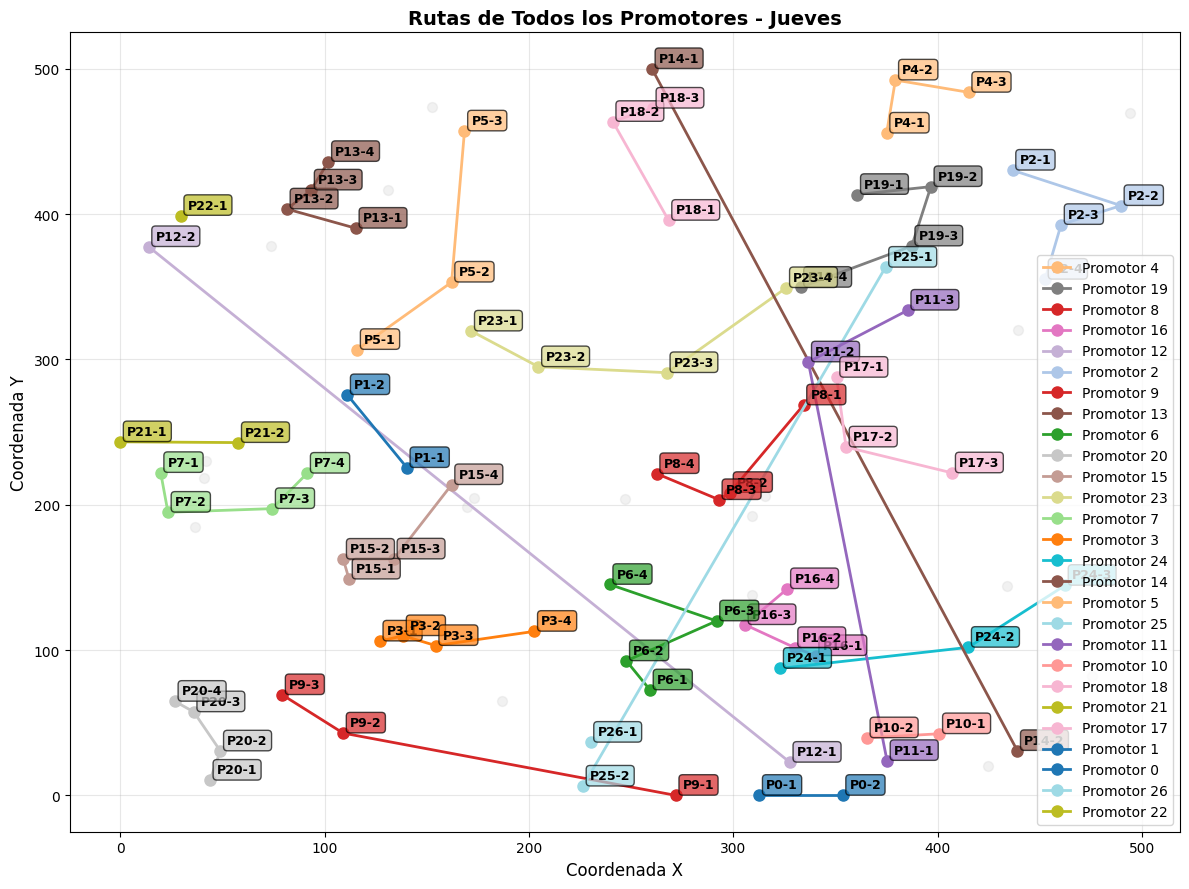

/tmp/ipython-input-2559434787.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


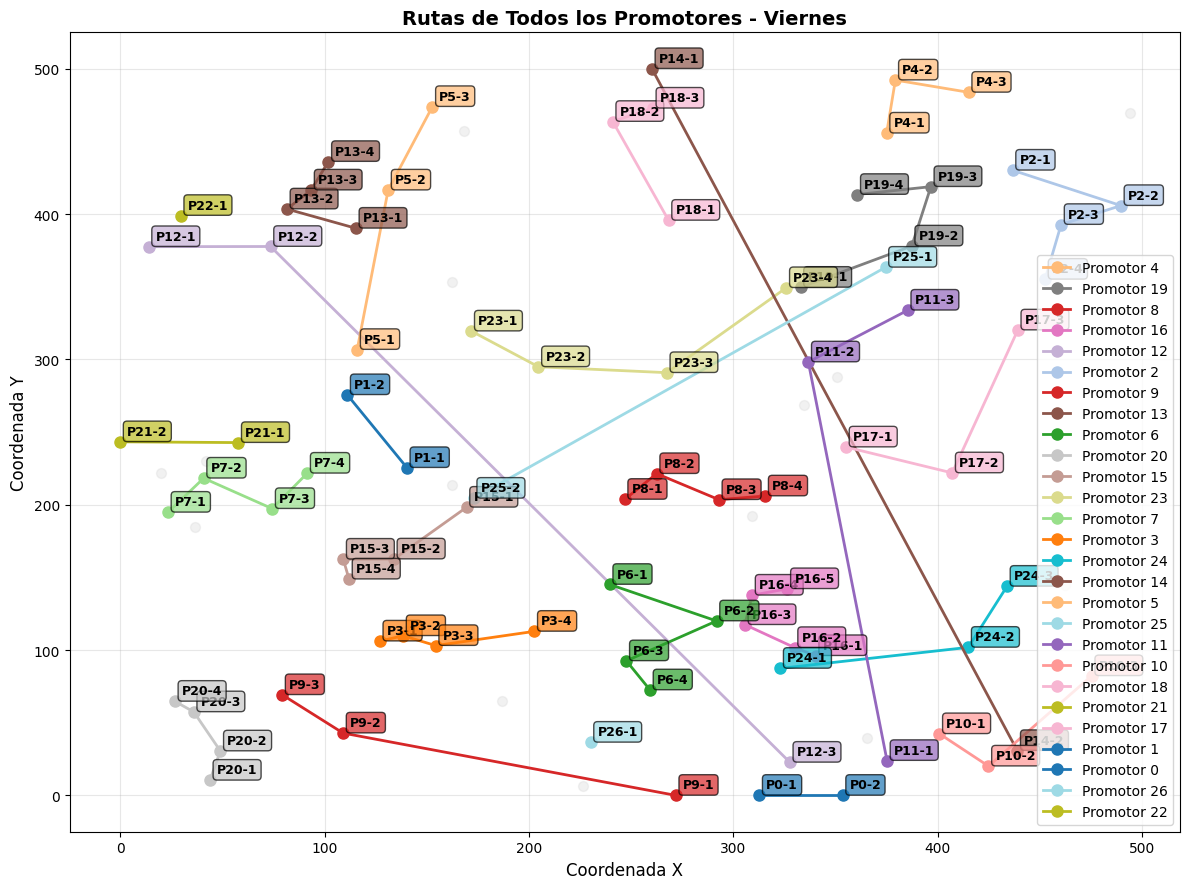

/tmp/ipython-input-2559434787.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)


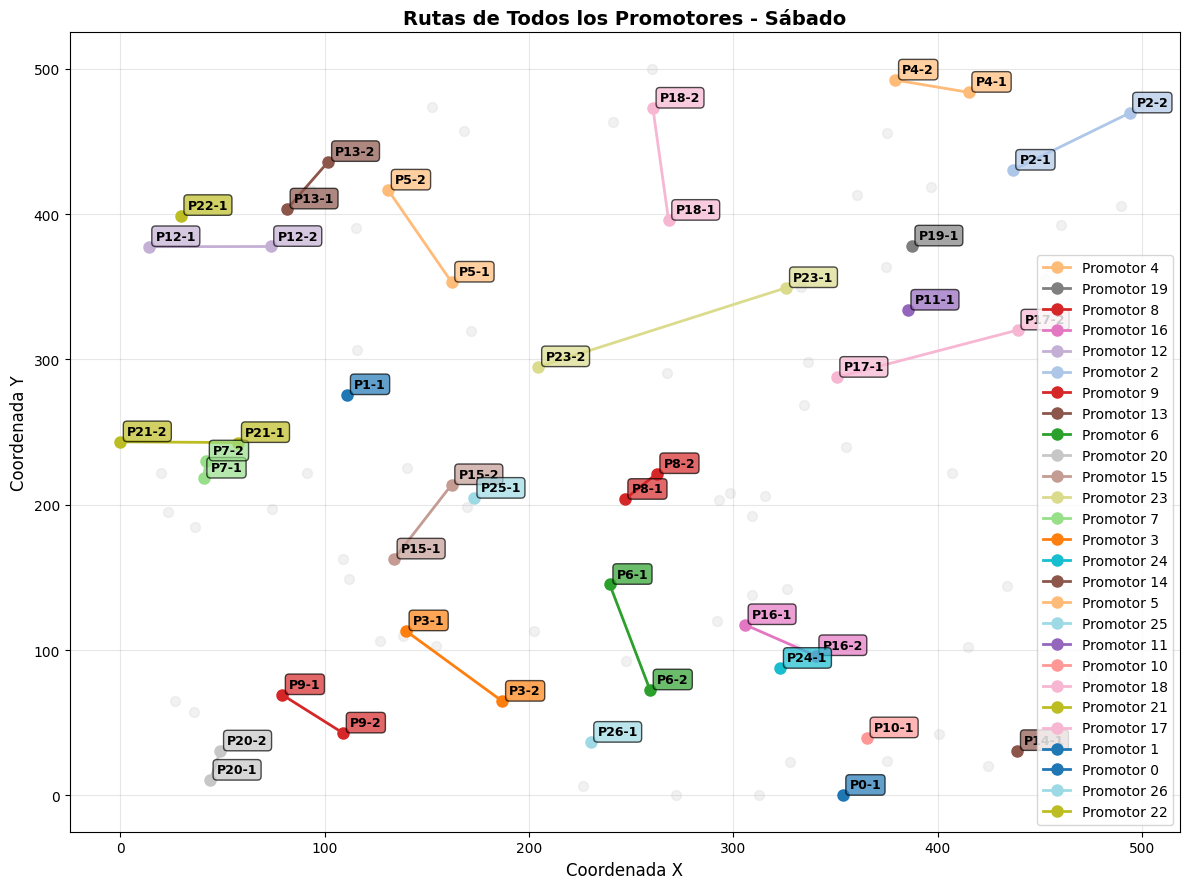


✅ Análisis completado. Archivo generado: reporte_rentabilidad_analisis_diario.csv

📊 RESUMEN EJECUTIVO: ANÁLISIS COMPARATIVO DE RENTABILIDAD

💰 RENTABILIDAD
────────────────────────────────────────────────────────────────────────────────
  Rentabilidad Inicial:        $39,345.00
  Rentabilidad Optimizada:     $49,816.00
  Incremento:                  $10,471.00  (26.6%)

⏱️  TIEMPO DE TRABAJO
────────────────────────────────────────────────────────────────────────────────
  Tiempo Inicial:              36,116.7 min  (601.9 hrs)
  Tiempo Optimizado:           57,186.0 min  (953.1 hrs)
  Incremento:                  21,069.2 min  (351.2 hrs)

⚠️  HORAS EXTRA
────────────────────────────────────────────────────────────────────────────────
  Horas Extra Iniciales:       277.3 min  (4.6 hrs)
  Horas Extra Optimizadas:     277.3 min  (4.6 hrs)
  ✅ Sin cambios               (0.0 hrs)

🏪 COBERTURA DE TIENDAS
────────────────────────────────────────────────────────────────────────────────
  Ti

In [ ]:
import pandas as pd
import numpy as np
from itertools import permutations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ==================================================
# FUNCIONES AUXILIARES
# ==================================================

def get_profitability_for_frequency(store_row, frequency):
    """Obtiene la rentabilidad correcta según la frecuencia de visitas."""
    freq = int(frequency)
    if freq < 1:
        freq = 1
    elif freq > 6:
        freq = 6

    col_name = f'profitability_freq_{freq}'

    if col_name in store_row.index:
        return store_row[col_name]
    else:
        return store_row.get('baseline_profitability', 0)


def calculate_day_metrics(visits, stores_df, distance_matrix):
    """
    Calcula métricas detalladas para un día específico.

    Returns:
        dict con: store_ids, num_visits, visit_time, travel_time, total_time
    """
    if not visits:
        return {
            'store_ids': [],
            'num_visits': 0,
            'visit_time': 0,
            'travel_time': 0,
            'total_time': 0
        }

    store_ids = [v['store_id'] for v in visits]
    visit_time = sum(v['duration'] for v in visits)

    # Calcular tiempo de viaje
    idx_map = {sid: stores_df[stores_df['store_id'] == sid].index[0]
              for sid in store_ids}

    travel_time = 0
    for i in range(len(store_ids) - 1):
        from_idx = idx_map[store_ids[i]]
        to_idx = idx_map[store_ids[i + 1]]
        travel_time += distance_matrix[from_idx][to_idx]

    return {
        'store_ids': store_ids,
        'num_visits': len(visits),
        'visit_time': visit_time,
        'travel_time': travel_time,
        'total_time': visit_time + travel_time
    }


def solve_tsp_bruteforce_quick(store_ids, distance_matrix, stores_df, closed=False):
    """Versión rápida del TSP por fuerza bruta."""
    if len(store_ids) <= 1:
        return store_ids

    store_to_df_idx = {}
    for sid in store_ids:
        matching_rows = stores_df[stores_df['store_id'] == sid]
        if len(matching_rows) > 0:
            store_to_df_idx[sid] = matching_rows.index[0]

    df_indices = [store_to_df_idx[sid] for sid in store_ids]

    best_distance = float('inf')
    best_route_indices = None

    for perm in permutations(df_indices):
        route = list(perm)
        distance = 0

        for i in range(len(route) - 1):
            distance += distance_matrix[route[i], route[i + 1]]

        if closed and len(route) > 1:
            distance += distance_matrix[route[-1], route[0]]

        if distance < best_distance:
            best_distance = distance
            best_route_indices = route

    df_idx_to_store = {v: k for k, v in store_to_df_idx.items()}
    optimal_store_ids = [df_idx_to_store[idx] for idx in best_route_indices]

    return optimal_store_ids


# ==================================================
# VISUALIZACIÓN DE RUTAS
# ==================================================

def plot_all_routes_for_day(stores_df, schedule, day, day_names):
    """Grafica rutas de todos los promotores para un día específico."""
    plt.figure(figsize=(12, 9))
    colors = cm.get_cmap('tab20', max(schedule.keys()) + 1)

    has_routes = False

    for promoter_id, days in schedule.items():
        visits = days.get(day, [])
        if not visits:
            continue

        has_routes = True
        store_ids = [v['store_id'] for v in visits]
        coords = stores_df.set_index("store_id").loc[store_ids][
            ["x_coordinate", "y_coordinate"]].values

        plt.plot(coords[:, 0], coords[:, 1], marker='o', markersize=8,
                linestyle='-', linewidth=2, label=f"Promotor {promoter_id}",
                color=colors(promoter_id))

        for i, (x, y) in enumerate(coords):
            plt.annotate(f"P{promoter_id}-{i+1}", xy=(x, y),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3',
                                facecolor=colors(promoter_id), alpha=0.7))

    # Todas las tiendas como fondo
    all_coords = stores_df[['x_coordinate', 'y_coordinate']].values
    plt.scatter(all_coords[:, 0], all_coords[:, 1],
               c='lightgray', s=50, alpha=0.3, zorder=0)

    plt.title(f"Rutas de Todos los Promotores - {day_names[day]}",
             fontsize=14, fontweight='bold')
    plt.xlabel("Coordenada X", fontsize=12)
    plt.ylabel("Coordenada Y", fontsize=12)
    plt.grid(True, alpha=0.3)
    if has_routes:
        plt.legend(loc='best', fontsize=10)
    plt.tight_layout()
    plt.show()


# ==================================================
# MAXIMIZACIÓN CON REPORTES TABULARES MEJORADOS
# ==================================================

def maximize_profitability_with_tables(schedule, stores_df, distance_matrix,
                                       days_available=[480, 480, 480, 480, 480, 240],
                                       closed_tsp=False):
    """
    Maximiza rentabilidad y genera reportes tabulares detallados con tiempos de desplazamiento.
    """

    # Crear copia del schedule
    improved_schedule = {p: {d: list(visits) for d, visits in days.items()}
                        for p, days in schedule.items()}

    day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

    # Lista para almacenar datos de todas las tablas
    all_tables_data = []

    # Para cada promotor
    for promoter in sorted(improved_schedule.keys()):
        promoter_stores = stores_df[stores_df['promoter'] == promoter].copy()

        # Datos para la tabla de este promotor
        promoter_data = []

        # Para cada día
        for day in range(6):
            visits = improved_schedule[promoter][day]
            limit = days_available[day]

            # === ANTES: Calcular métricas originales ===
            original_metrics = calculate_day_metrics(visits, stores_df, distance_matrix)
            original_stores = original_metrics['store_ids']
            original_time = original_metrics['total_time']
            original_visit_time = original_metrics['visit_time']
            original_travel_time = original_metrics['travel_time']
            free_time = limit - original_time

            # === PROCESO: Agregar nuevas visitas si hay tiempo libre ===
            new_stores_added = []
            time_used_new = 0

            if free_time > 0 and visits:
                visited_today = set(original_stores)
                available_stores = promoter_stores[
                    ~promoter_stores['store_id'].isin(visited_today)
                ].copy()

                if len(available_stores) > 0:
                    # Calcular frecuencia actual de cada tienda disponible
                    freq_counts = {}
                    for _, store in available_stores.iterrows():
                        sid = store['store_id']
                        current_freq = sum(1 for d in improved_schedule[promoter].values()
                                         for v in d if v['store_id'] == sid)
                        freq_counts[sid] = current_freq

                    # Calcular rentabilidad esperada
                    available_stores['future_frequency'] = available_stores['store_id'].map(
                        lambda sid: freq_counts.get(sid, 0) + 1
                    )
                    available_stores['expected_profitability'] = available_stores.apply(
                        lambda row: get_profitability_for_frequency(row, row['future_frequency']),
                        axis=1
                    )

                    available_stores = available_stores.sort_values(
                        'expected_profitability', ascending=False
                    )

                    # Agregar visitas
                    new_visits = []

                    for _, store in available_stores.iterrows():
                        visit_duration = store['visit_duration_minutes']

                        # Estimar tiempo de viaje
                        if new_visits:
                            last_store_id = new_visits[-1]['store_id']
                        else:
                            last_store_id = visits[-1]['store_id']

                        last_idx = stores_df[stores_df['store_id'] == last_store_id].index[0]
                        current_idx = store.name
                        estimated_travel = distance_matrix[last_idx][current_idx]

                        total_new_time = visit_duration + estimated_travel

                        if time_used_new + total_new_time <= free_time:
                            new_visit = {
                                'store_id': store['store_id'],
                                'duration': visit_duration,
                                'frequency': 1,
                                'visit_num': 1,
                                'total_freq': 1,
                                'expected_profitability': store['expected_profitability'],
                                'is_extra': True
                            }
                            new_visits.append(new_visit)
                            new_stores_added.append(store['store_id'])
                            time_used_new += total_new_time
                        else:
                            break

                    # Actualizar schedule si se agregaron visitas
                    if new_visits:
                        improved_schedule[promoter][day].extend(new_visits)

                        # Re-optimizar ruta
                        all_visits = improved_schedule[promoter][day]
                        all_store_ids = [v['store_id'] for v in all_visits]

                        optimal_route = solve_tsp_bruteforce_quick(
                            all_store_ids, distance_matrix, stores_df, closed=closed_tsp
                        )

                        optimized_visits = []
                        for sid in optimal_route:
                            visit = next(v for v in all_visits if v['store_id'] == sid)
                            optimized_visits.append(visit)

                        improved_schedule[promoter][day] = optimized_visits

            # === DESPUÉS: Calcular métricas finales ===
            final_metrics = calculate_day_metrics(
                improved_schedule[promoter][day], stores_df, distance_matrix
            )
            final_stores = final_metrics['store_ids']
            final_time = final_metrics['total_time']
            final_visit_time = final_metrics['visit_time']
            final_travel_time = final_metrics['travel_time']
            final_free = limit - final_time

            # Determinar estado
            if final_time > limit:
                estado = f'❌ Excede {round(final_time - limit, 1)} min'
            else:
                estado = f'✅ Libre {round(limit - final_time, 1)} min'

            # Formatear tiendas en formato vertical
            original_str = '\n'.join(original_stores) if original_stores else '-'
            nuevas_str = '\n'.join(new_stores_added) if new_stores_added else '-'
            ruta_final_str = '\n'.join(final_stores) if final_stores else '-'

            # Agregar fila a la tabla con información detallada de tiempos
            promoter_data.append({
                'Día': day_names[day],
                'Tiendas\nOriginales': original_str,
                'T.Visita\nOrig (min)': round(original_visit_time, 1),
                'T.Viaje\nOrig (min)': round(original_travel_time, 1),
                'Nuevas\nTiendas': nuevas_str,
                'Ruta\nFinal': ruta_final_str,
                'T.Visita\nFinal (min)': round(final_visit_time, 1),
                'T.Viaje\nFinal (min)': round(final_travel_time, 1),
                'T.Total\n(min)': round(final_time, 1),
                'Límite\n(min)': limit,
                'Estado': estado
            })

        # Crear DataFrame
        df_promoter = pd.DataFrame(promoter_data)

        # Resumen del promotor
        total_nuevas = sum(1 for row in promoter_data if row['Nuevas\nTiendas'] != '-')
        total_time_used = sum(row['T.Total\n(min)'] -
                             (df_promoter.iloc[i]['T.Visita\nOrig (min)'] +
                              df_promoter.iloc[i]['T.Viaje\nOrig (min)'])
                             for i, row in enumerate(promoter_data))

        all_tables_data.append({
            'promoter': promoter,
            'data': promoter_data,
            'days_improved': total_nuevas,
            'time_used': total_time_used
        })

    return improved_schedule, all_tables_data


# ==================================================
# EXPORTACIÓN A CSV SIMPLIFICADA
# ==================================================

def export_tables_to_csv_with_preview(tables_data, improved_schedule, stores_df, distance_matrix,
                                      base_filename='reporte_rentabilidad'):
    """
    Exporta el análisis diario detallado a CSV.
    """

    day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
    days_available = [480, 480, 480, 480, 480, 240]

    # ANÁLISIS DIARIO DETALLADO
    daily_analysis = []
    for table_info in tables_data:
        promoter = table_info['promoter']
        for row in table_info['data']:
            daily_analysis.append({
                'Promotor': promoter,
                'Dia': row['Día'],
                'Tiendas_Originales': row['Tiendas\nOriginales'].replace('\n', ', '),
                'Num_Tiendas_Orig': len(row['Tiendas\nOriginales'].split('\n')) if row['Tiendas\nOriginales'] != '-' else 0,
                'T_Visita_Orig_min': row['T.Visita\nOrig (min)'],
                'T_Viaje_Orig_min': row['T.Viaje\nOrig (min)'],
                'T_Total_Orig_min': row['T.Visita\nOrig (min)'] + row['T.Viaje\nOrig (min)'],
                'T_Libre_Orig_min': round(row['Límite\n(min)'] - (row['T.Visita\nOrig (min)'] + row['T.Viaje\nOrig (min)']), 1),
                'Nuevas_Tiendas': row['Nuevas\nTiendas'].replace('\n', ', '),
                'Num_Nuevas': len(row['Nuevas\nTiendas'].split('\n')) if row['Nuevas\nTiendas'] != '-' else 0,
                'Ruta_Final': row['Ruta\nFinal'].replace('\n', ' → '),
                'Num_Tiendas_Final': len(row['Ruta\nFinal'].split('\n')) if row['Ruta\nFinal'] != '-' else 0,
                'T_Visita_Final_min': row['T.Visita\nFinal (min)'],
                'T_Viaje_Final_min': row['T.Viaje\nFinal (min)'],
                'T_Total_Final_min': row['T.Total\n(min)'],
                'Limite_Diario_min': row['Límite\n(min)'],
                'T_Libre_Final_min': round(row['Límite\n(min)'] - row['T.Total\n(min)'], 1),
                'Utilizacion_porcentaje': round((row['T.Total\n(min)'] / row['Límite\n(min)']) * 100, 1),
                'Estado': row['Estado'].replace('✅ ', '').replace('❌ ', ''),
                'Mejora_Realizada': 'Si' if row['Nuevas\nTiendas'] != '-' else 'No'
            })

    df_daily = pd.DataFrame(daily_analysis)
    daily_file = f'{base_filename}_analisis_diario.csv'
    df_daily.to_csv(daily_file, index=False, encoding='utf-8-sig')

    return daily_file


# ==================================================
# FUNCIÓN PRINCIPAL
# ==================================================

def run_profit_maximization_with_csv_preview(stores_df, schedule, distance_matrix):
    """
    Ejecuta el proceso completo con generación de CSV y visualización de gráficas.
    """

    # Ejecutar maximización (sin prints)
    improved_schedule, tables_data = maximize_profitability_with_tables(
        schedule, stores_df, distance_matrix
    )

    # Exportar a CSV (solo análisis diario)
    csv_file = export_tables_to_csv_with_preview(
        tables_data, improved_schedule, stores_df, distance_matrix
    )

    # Generar gráficas de rutas diarias
    day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
    for day in range(6):
        plot_all_routes_for_day(stores_df, improved_schedule, day, day_names)

    print(f"\n✅ Análisis completado. Archivo generado: {csv_file}")

    return improved_schedule, csv_file


# ==================================================
# ANÁLISIS COMPARATIVO DE RENTABILIDAD
# ==================================================

def calculate_profitability_comparison(original_schedule, improved_schedule, stores_df, distance_matrix):
    """
    Calcula y compara la rentabilidad antes y después de la optimización.
    """

    def calculate_schedule_profitability(schedule):
        """Calcula rentabilidad total de un schedule."""
        total_profitability = 0
        frequency_count = {}

        # Contar frecuencias por tienda
        for promoter in schedule:
            for day in schedule[promoter]:
                for visit in schedule[promoter][day]:
                    store_id = visit['store_id']
                    frequency_count[store_id] = frequency_count.get(store_id, 0) + 1

        # Calcular rentabilidad
        for store_id, freq in frequency_count.items():
            store_row = stores_df[stores_df['store_id'] == store_id].iloc[0]
            profit = get_profitability_for_frequency(store_row, freq)
            total_profitability += profit

        return total_profitability, frequency_count

    def calculate_schedule_metrics(schedule):
        """Calcula métricas de tiempo y horas extra."""
        days_available = [480, 480, 480, 480, 480, 240]
        total_time = 0
        overtime_minutes = 0

        for promoter in schedule:
            for day in range(6):
                visits = schedule[promoter][day]
                if visits:
                    metrics = calculate_day_metrics(visits, stores_df, distance_matrix)
                    day_time = metrics['total_time']
                    total_time += day_time

                    # Calcular horas extra
                    if day_time > days_available[day]:
                        overtime_minutes += (day_time - days_available[day])

        return total_time, overtime_minutes

    # Calcular rentabilidad
    profit_before, freq_before = calculate_schedule_profitability(original_schedule)
    profit_after, freq_after = calculate_schedule_profitability(improved_schedule)

    # Calcular métricas de tiempo
    time_before, overtime_before = calculate_schedule_metrics(original_schedule)
    time_after, overtime_after = calculate_schedule_metrics(improved_schedule)

    # Calcular aumentos
    profit_increase = profit_after - profit_before
    profit_increase_pct = (profit_increase / profit_before * 100) if profit_before > 0 else 0

    time_increase = time_after - time_before
    overtime_increase = overtime_after - overtime_before

    # Calcular total de visitas
    visits_before = sum(freq_before.values())
    visits_after = sum(freq_after.values())

    return {
        'profit_before': profit_before,
        'profit_after': profit_after,
        'profit_increase': profit_increase,
        'profit_increase_pct': profit_increase_pct,
        'time_before_min': time_before,
        'time_after_min': time_after,
        'time_increase_min': time_increase,
        'time_before_hrs': time_before / 60,
        'time_after_hrs': time_after / 60,
        'time_increase_hrs': time_increase / 60,
        'overtime_before_min': overtime_before,
        'overtime_after_min': overtime_after,
        'overtime_increase_min': overtime_increase,
        'overtime_before_hrs': overtime_before / 60,
        'overtime_after_hrs': overtime_after / 60,
        'overtime_increase_hrs': overtime_increase / 60,
        'unique_stores_before': len(freq_before),
        'unique_stores_after': len(freq_after),
        'new_stores_added': len(freq_after) - len(freq_before)
    }


def display_profitability_summary(comparison):
    """
    Muestra un resumen ejecutivo de la comparación de rentabilidad.
    """
    print("\n" + "="*80)
    print("📊 RESUMEN EJECUTIVO: ANÁLISIS COMPARATIVO DE RENTABILIDAD")
    print("="*80)

    print("\n💰 RENTABILIDAD")
    print("─" * 80)
    print(f"  Rentabilidad Inicial:        ${comparison['profit_before']:,.2f}")
    print(f"  Rentabilidad Optimizada:     ${comparison['profit_after']:,.2f}")
    print(f"  Incremento:                  ${comparison['profit_increase']:,.2f}  ({comparison['profit_increase_pct']:.1f}%)")

    print("\n⏱️  TIEMPO DE TRABAJO")
    print("─" * 80)
    print(f"  Tiempo Inicial:              {comparison['time_before_min']:,.1f} min  ({comparison['time_before_hrs']:.1f} hrs)")
    print(f"  Tiempo Optimizado:           {comparison['time_after_min']:,.1f} min  ({comparison['time_after_hrs']:.1f} hrs)")
    print(f"  Incremento:                  {comparison['time_increase_min']:,.1f} min  ({comparison['time_increase_hrs']:.1f} hrs)")

    print("\n⚠️  HORAS EXTRA")
    print("─" * 80)
    print(f"  Horas Extra Iniciales:       {comparison['overtime_before_min']:,.1f} min  ({comparison['overtime_before_hrs']:.1f} hrs)")
    print(f"  Horas Extra Optimizadas:     {comparison['overtime_after_min']:,.1f} min  ({comparison['overtime_after_hrs']:.1f} hrs)")

    if comparison['overtime_increase_min'] > 0:
        print(f"  ⚠️  Incremento:                {comparison['overtime_increase_min']:,.1f} min  ({comparison['overtime_increase_hrs']:.1f} hrs)")
    elif comparison['overtime_increase_min'] < 0:
        print(f"  ✅ Reducción:                 {abs(comparison['overtime_increase_min']):,.1f} min  ({abs(comparison['overtime_increase_hrs']):.1f} hrs)")
    else:
        print(f"  ✅ Sin cambios               (0.0 hrs)")

    print("\n🏪 COBERTURA DE TIENDAS")
    print("─" * 80)
    print(f"  Tiendas Visitadas Inicial:   {comparison['unique_stores_before']}")
    print(f"  Tiendas Visitadas Final:     {comparison['unique_stores_after']}")
    print(f"  Nuevas Tiendas Agregadas:    {comparison['new_stores_added']}")

    print("\n" + "="*80)

    # Calcular métricas de eficiencia
    roi = (comparison['profit_increase'] / (comparison['time_increase_hrs'] if comparison['time_increase_hrs'] > 0 else 1))

    print("📈 INDICADORES DE EFICIENCIA")
    print("─" * 80)
    print(f"  ROI por Hora Adicional:      ${roi:,.2f}/hr")

    if comparison['overtime_increase_hrs'] <= 0:
        print(f"  Estado Horas Extra:          ✅ MEJORADO (reducción o sin cambios)")
    else:
        print(f"  Estado Horas Extra:          ⚠️ AUMENTADO (+{comparison['overtime_increase_hrs']:.1f} hrs)")

    print("="*80 + "\n")


def generate_store_frequency_table(original_schedule, improved_schedule, stores_df):
    """
    Genera una tabla detallada mostrando la frecuencia anterior, nueva y ganancia por tienda.
    """
    # Calcular frecuencias antes
    freq_before = {}
    for promoter in original_schedule:
        for day in original_schedule[promoter]:
            for visit in original_schedule[promoter][day]:
                store_id = visit['store_id']
                freq_before[store_id] = freq_before.get(store_id, 0) + 1

    # Calcular frecuencias después
    freq_after = {}
    for promoter in improved_schedule:
        for day in improved_schedule[promoter]:
            for visit in improved_schedule[promoter][day]:
                store_id = visit['store_id']
                freq_after[store_id] = freq_after.get(store_id, 0) + 1

    # Obtener todas las tiendas únicas
    all_stores = set(list(freq_before.keys()) + list(freq_after.keys()))

    # Crear datos para la tabla
    table_data = []
    for store_id in sorted(all_stores):
        store_row = stores_df[stores_df['store_id'] == store_id].iloc[0]

        freq_orig = freq_before.get(store_id, 0)
        freq_new = freq_after.get(store_id, 0)

        # Calcular ganancias
        profit_before = get_profitability_for_frequency(store_row, freq_orig) if freq_orig > 0 else 0
        profit_after = get_profitability_for_frequency(store_row, freq_new) if freq_new > 0 else 0
        profit_change = profit_after - profit_before

        # Determinar estado
        if freq_new > freq_orig:
            estado = "📈 Aumentó"
        elif freq_new < freq_orig:
            estado = "📉 Disminuyó"
        elif freq_new == 0:
            estado = "➖ Sin visitas"
        else:
            estado = "➡️  Sin cambio"

        table_data.append({
            'Tienda': store_id,
            'Promotor': store_row['promoter'],
            'Frec_Anterior': freq_orig,
            'Frec_Nueva': freq_new,
            'Cambio_Frec': freq_new - freq_orig,
            'Ganancia_Anterior': round(profit_before, 2),
            'Ganancia_Nueva': round(profit_after, 2),
            'Incremento_Ganancia': round(profit_change, 2),
            'Estado': estado
        })

    # Crear DataFrame
    df_table = pd.DataFrame(table_data)

    # Ordenar por incremento de ganancia (descendente)
    df_table = df_table.sort_values('Incremento_Ganancia', ascending=False)

    return df_table


def display_store_frequency_table(df_table):
    """
    Muestra la tabla de frecuencias y ganancias por tienda.
    """
    print("\n" + "="*120)
    print("🏪 ANÁLISIS DETALLADO POR TIENDA: FRECUENCIAS Y GANANCIAS")
    print("="*120)

    # Configurar pandas para mostrar toda la tabla
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_columns', None)

    print("\n" + df_table.to_string(index=False))

    # Resumen
    print("\n" + "─"*120)
    print("📊 RESUMEN")
    print("─"*120)

    tiendas_aumentaron = len(df_table[df_table['Cambio_Frec'] > 0])
    tiendas_disminuyeron = len(df_table[df_table['Cambio_Frec'] < 0])
    tiendas_sin_cambio = len(df_table[df_table['Cambio_Frec'] == 0]) - len(df_table[(df_table['Frec_Anterior'] == 0) & (df_table['Frec_Nueva'] == 0)])
    tiendas_nuevas = len(df_table[(df_table['Frec_Anterior'] == 0) & (df_table['Frec_Nueva'] > 0)])

    print(f"  📈 Tiendas con frecuencia aumentada:    {tiendas_aumentaron}")
    print(f"  📉 Tiendas con frecuencia disminuida:   {tiendas_disminuyeron}")
    print(f"  ➡️  Tiendas sin cambio de frecuencia:   {tiendas_sin_cambio}")
    print(f"  ✨ Tiendas nuevas agregadas:            {tiendas_nuevas}")
    print(f"  💰 Incremento total de ganancia:        ${df_table['Incremento_Ganancia'].sum():,.2f}")

    print("="*120 + "\n")

    return df_table


# ==================================================
# EJECUCIÓN AUTOMÁTICA
# ==================================================

try:
    _ = stores_df
    _ = schedule
    _ = dist_matrix

    # Guardar schedule original
    original_schedule = {p: {d: list(visits) for d, visits in days.items()}
                        for p, days in schedule.items()}

    # Ejecutar optimización
    improved_schedule, csv_file = run_profit_maximization_with_csv_preview(
        stores_df, schedule, dist_matrix
    )

    # Calcular y mostrar comparación
    comparison = calculate_profitability_comparison(original_schedule, improved_schedule, stores_df, dist_matrix)
    display_profitability_summary(comparison)

    # Generar y mostrar tabla de frecuencias por tienda
    df_frequency_table = generate_store_frequency_table(original_schedule, improved_schedule, stores_df)
    display_store_frequency_table(df_frequency_table)

except NameError:
    print("\n⚠️  ESPERANDO VARIABLES DEL CÓDIGO PRINCIPAL")
    print("Ejecuta primero las celdas anteriores con solve_phase1_geographic()")